# **📌 Team PROJECT**  
**┗ 삼성 브랜드의 전자 제품 경쟁력 재고를 위한 고객 관점 관찰 및 분석**
---


### 프로젝트 Summary
---


> **프로젝트명**

```
▶ 삼성 브랜드의 전자 제품 경쟁력 재고를 위한 고객 관점 관찰 및 분석
```

> **프로젝트유형**

```
▶ 데이터 EDA 및 Segmentation, Funnel분석, 군집분석, 협업 필터링(Collaborative Filtering)
```
> **학습목표**

```
▶ 이커머스 데이터의 특성을 파악하고, 고객의 재구매, 이탈 등의 패턴을 분석하는 능력 개발
▶ 다양한 기간과 세그먼트에 따른 고객 행동의 변화를 시각적으로 표현하는 능력 향상
▶ 분석 결과를 바탕으로 마케팅 및 영업 전략을 제안할 수 있는 능력 개발
▶ 다양한 통계적 검정방법을 사용하여 테스트 결과의 유의성을 평가하는 능력 향상
```
> **예상 결과물**

```
▶ 시간에 따른 고객 행동 변화를 나타내는 시각화 자료
▶ 고객 분석 리포트(고객별 이탈률, 주요 이탈 원인 등)
▶ 데이터 시각화 대시보드(예: Tableau, Power BI 등을 사용한 대시보드)
▶ 분석 결과를 기반으로 한 마케팅 및 영업 전략 제안서
▶ 통계적 방법을 사용한 테스트 결과의 유의성 검증 결과

```

> **시나리오**

```
▶ 삼성(Samsung)의 직원으로서 브랜드의 이커머스 시장에서 경쟁력과 시장점유율을 확대할 계획에 있다. 런칭 이후 매출 10위권에 위치했지만 글로벌 브랜드 사이에서 성장을 모색하고 있다.
▶ 삼성 브랜드 인지도는 해당 시장에서 경쟁력이 있다고 판단되는 한편, 고객 데이터를 활용해서 이커머스 판매 확대 가능성이 보이는 제품군을 선별하고 선택과 집중을 하기 위한 분석을 수행하고자 한다.
```

> **데이터 살펴보기**

* 이커머스 온라인 구매 데이터
* 데이터 명세 ⬇

|event_time|event_type|product_id|category_id|brand|price|user_id|user_session|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|이벤트 시간|이벤트 유형|제품 ID|카테고리 ID|브랜드|가격|사용자 ID|사용자 세션|


In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/팀프로젝트')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/팀프로젝트'

In [2]:
# ▶ Data read
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('events.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


### A1. 데이터 전처리

In [ ]:
# 실습 구분을 위한 데이터프레임 df2로 생성

df2 = df.copy()
df2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [ ]:
# ▶ Data 형태 확인
# ▶ 885,129 row, 9 col로 구성됨
df2.shape

(885129, 9)

In [ ]:
# ▶ Data type 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [ ]:
# ▶ Null 값 확인
df2.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

In [ ]:
#Null값 채우기 catefory_code & brand 컬럼은 unknown으로 대체
df2['category_code'].fillna('unknown',inplace=True)
df2['brand'].fillna('unknown',inplace=True)

In [ ]:
# category_code를 점을 기준으로 분할하여 마지막 값만 선택하여 category_1 열에 할당
df2['category_1'] = df2['category_code'].str.split('.').str[-1]
df2['category_1'].value_counts()

category_1
unknown          236219
videocards       116717
telephone         84360
printer           43224
cartrige          38725
                  ...  
bath                 33
blanket              26
refrigerators        15
briefcase            13
winch                 6
Name: count, Length: 106, dtype: int64

In [ ]:
# user_session Null 값은 삭제

df2.dropna(subset=['user_session'], inplace=True)

In [ ]:
# ▶ Null 값 확인
df2.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
category_1       0
dtype: int64

In [ ]:
# 결측치 값 삭제되었는지 확인하기
# 기존 데이터 쉐입은 (885,129, 9) -> (884,964, 10)

df2.shape

(884964, 10)

In [ ]:
# 수치형 분포 확인

df2.describe()

,product_id,category_id,price,user_id
count,8.849640e+05,8.849640e+05,884964.000000,8.849640e+05
mean,1.906619e+06,2.144423e+18,146.320109,1.515916e+18
std,1.458717e+06,6.165680e+14,296.793600,3.554126e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452884e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [ ]:
df2.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'category_1'],
      dtype='object')

### A2. 데이터 전처리 2

In [ ]:
# event_time

df2['event_time'].min(),df2['event_time'].max()

('2020-09-24 11:57:06 UTC', '2021-02-28 23:59:09 UTC')

In [ ]:
# event_time 컬럼에서 UTC 빼고 다시 event_time에 넣어줌

df2['event_time'] = df['event_time'].str[0:19]
df2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_1
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,telephone
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,cooler
2,2020-09-24 11:57:27,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,unknown
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,printer
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,unknown


In [ ]:
# event_time 데이터타입을 datetime으로 변경

df2['event_time'] = pd.to_datetime(df2['event_time'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884964 entries, 0 to 885128
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_time     884964 non-null  datetime64[ns]
 1   event_type     884964 non-null  object        
 2   product_id     884964 non-null  int64         
 3   category_id    884964 non-null  int64         
 4   category_code  884964 non-null  object        
 5   brand          884964 non-null  object        
 6   price          884964 non-null  float64       
 7   user_id        884964 non-null  int64         
 8   user_session   884964 non-null  object        
 9   category_1     884964 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 74.3+ MB


In [ ]:
# event_type

df2['event_type'].value_counts()

event_type
view        793589
cart         54029
purchase     37346
Name: count, dtype: int64

In [ ]:
# product_id ( 53,452개 )

df2['product_id'].nunique()

53452

In [ ]:
# category_id ( 718개 )

df2['category_id'].nunique()

718

In [ ]:
# category_code(106개)

df2['category_1'].value_counts()

category_1
unknown          236172
videocards       116712
telephone         84343
printer           43219
cartrige          38719
                  ...  
bath                 33
blanket              26
refrigerators        15
briefcase            13
winch                 6
Name: count, Length: 106, dtype: int64

In [ ]:
df2['category_1'].nunique()

106

In [ ]:
# category_id와 category_code의 매칭이 1:1인지 확인

print(df2[df2['category_code'] == 'computers.components.videocards']['category_id'].nunique())
print(df2[df2['category_code'] == 'electronics.telephone ']['category_id'].nunique())
print(df2[df2['category_code'] == 'computers.peripherals.printer']['category_id'].nunique())
print(df2[df2['category_code'] == 'stationery.cartrige']['category_id'].nunique())
print(df2[df2['category_code'] == 'electronics.audio.acoustic']['category_id'].nunique())

1
0
8
3
8


In [ ]:
df2[df2['category_code'] == 'computers.peripherals.printer']['category_id'].unique()

array([2144415923107266682, 2144415933727244688, 2144415934608048556,
       2144415933693690255, 2144415941092442716, 2144415939330834990,
       2144415957383118890, 2144415943743242916])

In [ ]:
df2[df2['category_code'] == 'stationery.cartrige']['category_id'].unique()

array([2144415925011480748, 2144415941125997149, 2144415933760799121])

In [ ]:
df2[df2['category_code'] == 'electronics.audio.acoustic']['category_id'].unique()

array([2144415975410238005, 2144415926445932750, 2144415924424278172,
       2144415923837075596, 2144415974135169554, 2144415927611949295,
       2144415927318348006, 2144415927351902439])

```
▶ category_code 안에 여러가지의 category_id가 존재함
```

In [ ]:
# brand

df2['brand'].value_counts()

brand
unknown      212326
asus          27703
gigabyte      27673
msi           24876
palit         24801
              ...  
elekta            1
vitesse           1
vitek             1
docash            1
cipherlab         1
Name: count, Length: 1000, dtype: int64

In [ ]:
# brand ( 1000개 )

df2['brand'].nunique()

1000

## A3. Ecommerce Market 분석
  

#### A3-1) Event Type 분석

In [ ]:
# view에서 purchase 전환율 4.4%
df2['event_type'].value_counts(normalize=True)*100

event_type
view        89.674721
cart         6.105220
purchase     4.220059
Name: proportion, dtype: float64

#### A3-2) Event Time 분석

In [ ]:
# 9~11 사이가 전환율이 가장 높음
df2['hour']=df2['event_time'].dt.hour

# ▶ 시간대별 이벤트 유형별 발생 횟수 계산
hourly_events=df2.groupby(['hour', 'event_type']).size().unstack().fillna(0)

# ▶ 시간대별 구매 전환률 계산: 구매수 / 조회수
hourly_events['conversion_rate'] = hourly_events['purchase'] / hourly_events['view'] * 100

hourly_events[['view', 'cart', 'purchase', 'conversion_rate']]

# ▶ gradient 시각화
styled_all_columns = hourly_events.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
styled_all_columns

event_type,cart,purchase,view,conversion_rate
hour,,,,
0,584,361,9346,3.862615
1,532,328,9096,3.605981
2,612,403,10159,3.966926
3,907,575,13780,4.172714
4,1169,788,19029,4.141048
5,1829,1165,26763,4.353025
6,2421,1691,35486,4.765260
7,2954,2000,42008,4.760998
8,3070,2215,44646,4.961251


([<matplotlib.axis.XTick at 0x7e797976b880>,
 [Text(0, 0, '9'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '1'),
  Text(5, 0, '2')])

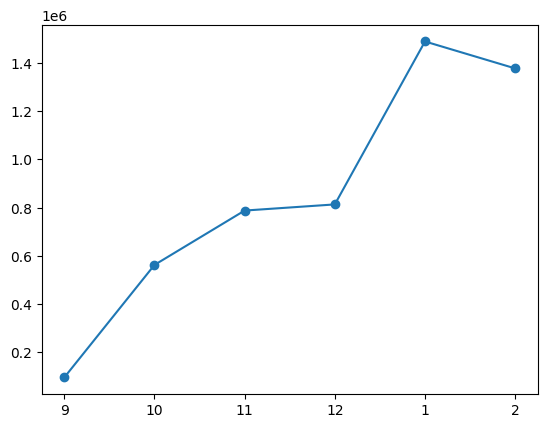

In [ ]:
# 9월은 24일부터 데이터가 기록 → 9월 월매출이 가장 낮을수밖에 없음!
# 전반적으로 상승중!
purchase_data=df2[df2['event_type']=='purchase']
purchase_data['month']=purchase_data['event_time'].dt.month
data_month_sales=purchase_data.groupby('month')['price'].sum()

# 원하는 순서대로 month 값을 가지는 새로운 데이터프레임 생성
desired_order = [9, 10, 11, 12, 1, 2]
data_month_sales_sorted = data_month_sales.reindex(desired_order)

# 새로운 순서로 데이터 시각화
plt.plot(range(len(data_month_sales_sorted)), data_month_sales_sorted.values, marker='o', linestyle='-')
plt.xticks(range(len(data_month_sales_sorted)), data_month_sales_sorted.index)

```
▶ 전환율이 가장 높은 시간인 9~11시에 쿠폰이나 이벤트를 제공하여 purchase까지 이어질 수 있도록 활용하면 좋을 것 같음.
* Ecommerce의 월 매출은 전반적으로 상승세임.
   - 9월의 매출은 24일부터의 기록이기 때문에 가장 낮을 수 밖에 없음
```

### A3-3) Brand 분석

In [ ]:
# 삼성 발견!
# samsung의 view count 순위 알아보기 (5위)

view_data=df2[df2['event_type']=='view']
view_brand_counts= view_data.groupby('brand').agg(count=('brand','count'),mean_price=('price','mean')).sort_values(by='count',ascending=False)
view_brand_counts.head(10)

,count,mean_price
brand,,
unknown,190304,76.743988
asus,24314,236.438503
gigabyte,22780,319.907644
palit,21483,468.528971
samsung,21411,223.497784
msi,19953,360.722812
amd,17188,186.274850
canon,16041,150.612549
panasonic,11335,154.581118


In [ ]:
# samsung의 purchase 금액 총합 순위 알아보기 (13위)

purchase_data=df2[df2['event_type']=='purchase']
purchase_brand_counts= purchase_data.groupby('brand').agg(count=('brand','count'),sales=('price','sum')).sort_values(by='sales',ascending=False)
purchase_brand_counts.head(13)

,count,sales
brand,,
msi,1788,643492.34
unknown,9501,594729.99
gigabyte,1741,556183.04
palit,1077,484210.58
asus,1261,330147.11
sapphire,917,306192.94
amd,1020,191987.40
canon,1045,137964.79
powercolor,272,98804.38


In [ ]:
purchase_brand_counts= purchase_data.groupby('brand').agg(count=('brand','count'),sales=('price','sum'),avg_price=('price','mean')).sort_values(by='sales',ascending=False)
purchase_brand_counts.head(13)

,count,sales,avg_price
brand,,,
msi,1788,643492.34,359.895045
unknown,9501,594729.99,62.596568
gigabyte,1741,556183.04,319.461827
palit,1077,484210.58,449.591996
asus,1261,330147.11,261.813727
sapphire,917,306192.94,333.907241
amd,1020,191987.40,188.222941
canon,1045,137964.79,132.023722
powercolor,272,98804.38,363.251397


```
▶ 삼성의 view count는 top 5안에 들지만 purchase 총합 순위가 13위인 이유가 무엇일까?
```

### A3-4) Category 분석

In [ ]:
# view 카테고리 검색 순위
view_data.groupby('category_1').agg(sales=('price','sum'),count=('category_1','count')).sort_values(by='count',ascending=False).head(10)

,sales,count
category_1,,
unknown,18368626.67,218196
videocards,37605425.00,97141
telephone,5878446.79,74839
printer,6565491.54,37479
cartrige,1814397.67,32939
acoustic,2877585.73,24776
motherboard,2315337.19,23221
notebook,1752227.95,22213
cpu,4120375.32,21314


In [ ]:
# purchase 판매량 순위
purchase_data.groupby('category_1').agg(sales=('price','sum'),count=('category_1','count')).sort_values(by='count',ascending=False).head(10)

,sales,count
category_1,,
unknown,493933.32,7568
videocards,2604764.80,6888
telephone,150915.69,4119
cartrige,103595.99,2739
printer,364566.80,2557
notebook,63604.79,1297
motherboard,102871.16,1266
cpu,219168.98,1213
acoustic,84724.80,848


In [ ]:
# purchase 매출 순위
purchase_data.groupby('category_1').agg(sales=('price','sum'),count=('category_1','count')).sort_values(by='sales',ascending=False).head(10)

,sales,count
category_1,,
videocards,2604764.80,6888
unknown,493933.32,7568
printer,364566.80,2557
cpu,219168.98,1213
telephone,150915.69,4119
cartrige,103595.99,2739
motherboard,102871.16,1266
acoustic,84724.80,848
player,81558.66,685


```
▶  view에서 검색한 category와 실제 구매로 이어진 purchase 카테고리 간의 차이가 존재함.
    * view count가 높다고 해서 purchase count가 높은건 아님.
```



```
# 코드로 형식 지정됨
```

## A4. 삼성 분석 및 브랜드 전략

In [ ]:
# samsung의 매출(Price)이 좋은 제품 top10

samsung_revenue_top = df2[(df2['brand'] == 'samsung') & (df2['event_type']=='purchase')].groupby(['brand', 'category_1']).agg(sales=('price','sum'),count=('category_1','count'),avg_price=('price','mean')).sort_values('sales', ascending=False)
samsung_revenue_top.head(10)

sales  count   avg_price
brand   category_1                             
samsung telephone   22558.46    272   82.935515
        tablet      11482.47    218   52.671881
        tv           7641.54     11  694.685455
        unknown      6033.74    205   29.432878
        printer      2508.11     13  192.931538
        hdd          1711.47     20   85.573500
        monitor      1579.73      7  225.675714
        microwave     808.46      5  161.692000
        headphone     191.78      5   38.356000
        cartrige      108.74      2   54.370000

```
▶ samsung의 매출 top3은
  * telephone
  * tablet
  * tv

▶ samsung의 판매량 top3은  
  * telephone
  * tablet
  * unknown
```

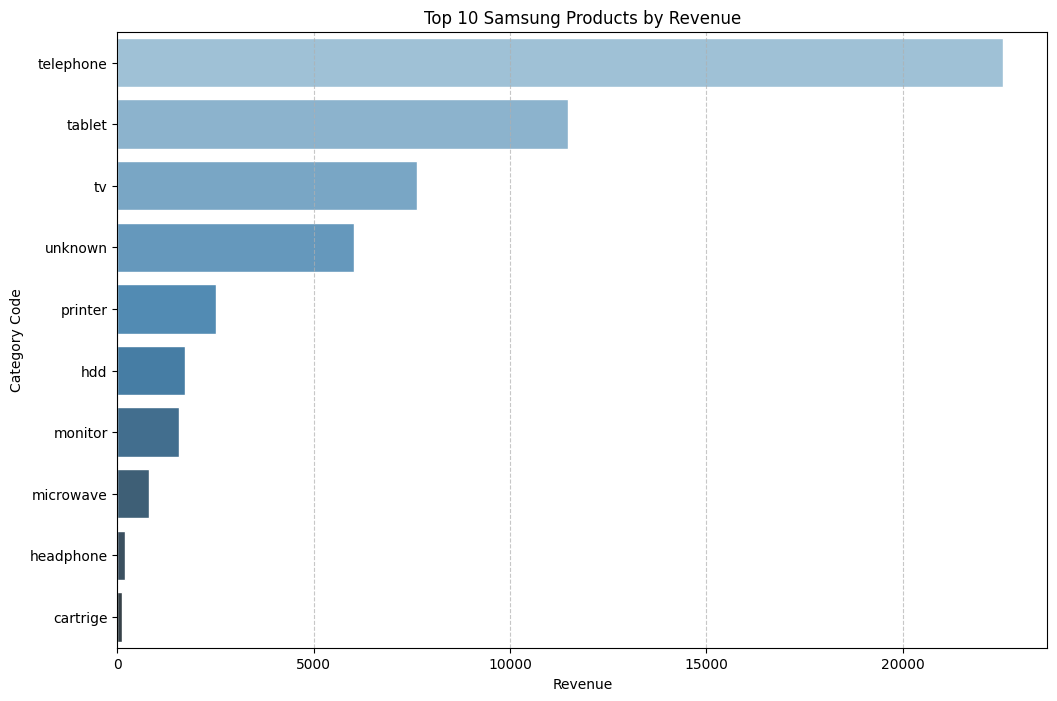

In [ ]:
# 상위 10개 매출 제품에 대한 시각화

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    x='sales',
    y='category_1',
    data=samsung_revenue_top,
    ci=None,
    palette='Blues_d',
    edgecolor='w'
)

plt.title('Top 10 Samsung Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Category Code')
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.show()

In [ ]:
# samsung의 판매량이 좋은 제품 top10

samsung_revenue_cnt_top = df2[(df2['brand'] == 'samsung') & (df2['event_type']=='purchase')].groupby(['brand', 'category_1']).agg(count=('category_1','count')).sort_values('count', ascending=False)
samsung_revenue_cnt_top.head(10)

count
brand   category_1       
samsung telephone     272
        tablet        218
        unknown       205
        hdd            20
        printer        13
        tv             11
        monitor         7
        headphone       5
        microwave       5
        cartrige        2

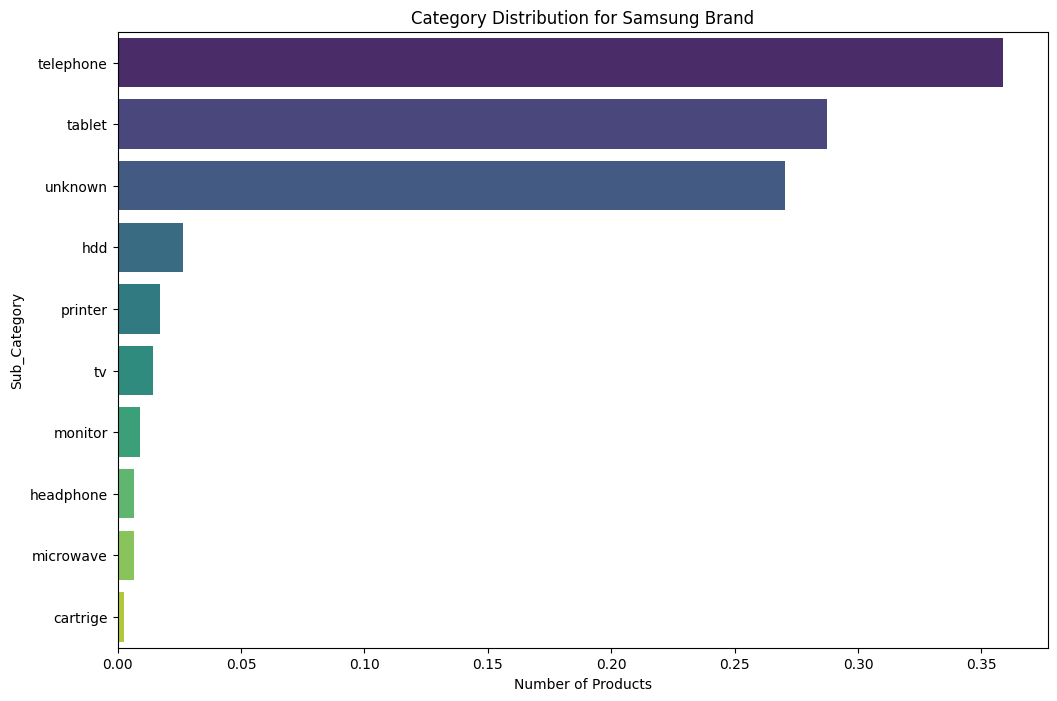

In [ ]:
# 브랜드 'samsung'에 해당하는 category_code의 분포를 시각화

# 'samsung' 브랜드의 카테고리 코드 분포 데이터 준비
samsung_category_counts = df2[(df2['brand'] == 'samsung')&(df2['event_type']=='purchase')]['category_1'].value_counts(10)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(y=samsung_category_counts.index, x=samsung_category_counts.values, palette='viridis')
plt.title('Category Distribution for Samsung Brand')
plt.xlabel('Number of Products')
plt.ylabel('Sub_Category')
plt.show()

```
▶ 판매 수익 top10에 핸드폰이랑 타블렛, 티비 외에도 'unknown'을 포함, 프린터, 전자레인지, 모니터 등이 있음.
```

#### 세부 분석 : 1. telephone 시장 확인

##### (1) 매출 분석

In [ ]:
# samsumg의 매출 1위 제품 = telephone
# category_code가 electronics.telephone의 매출이 가장 높은 브랜드 Top

df2[(df2['category_1'] == 'telephone') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(price=('price','sum')).sort_values('price', ascending=False).head(6)

price
category_1 brand              
telephone  unknown    67743.18
           samsung    22558.46
           sirius     16287.39
           xiaomi      7667.09
           alcatel     4663.65
           panasonic   4454.44

```
▶ category_1이 telephone이면서 매출이 높은 Top6   
    1위 : unknown  
    2위 : samsung  
    3위 : sirius  
    4위 : xiaomi  
    5위 : alcatel  
    6위 : panasonic
```

##### (2) 판매량 분석

In [ ]:
# category_1이 telephone의 판매량이 가장 높은 브랜드 Top5

df2[(df2['category_1'] == 'telephone') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(count=('category_1','count'),avg_price=('price','mean')).sort_values('count', ascending=False).head(6)

count  avg_price
category_1 brand                      
telephone  unknown     2525  26.828982
           sirius       697  23.367848
           samsung      272  82.935515
           spigen       102  23.880098
           ark           66  53.129091
           panasonic     57  78.148070

```
▶ category_1이 telephone이면서 판매량이 높은 Top6   
    1위 : unknown  
    2위 : sirius  
    3위 : samsung  
    4위 : spigen  
    5위 : ark  
    6위 : panasonic
```

In [ ]:
df2[(df2['category_1'] == 'telephone') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(count=('category_1','count'),sales=('price','sum'),avg_price=('price','mean')).sort_values('sales', ascending=False).head(5)

count     sales   avg_price
category_1 brand                               
telephone  unknown   2525  67743.18   26.828982
           samsung    272  22558.46   82.935515
           sirius     697  16287.39   23.367848
           xiaomi      31   7667.09  247.325484
           alcatel     40   4663.65  116.591250

In [ ]:
# 판매된 telephone의 평균 가격

df2[(df2['category_1'] == 'telephone') & (df2['event_type'] == 'purchase')]['price'].mean()

36.63891478514203

```
▶ 결과 : 삼성의 telephone은 프리미엄 전략으로 상품을 판매하고 있음.
    * samsung의 tablet 평균 단가는 약 82로 높은 반면, unknown은 26, sirius는 약 53임.
    * telephone의 평균 단가는 36임.
- 판매 수량은 3위인 반면, 매출 기준 telephone에서 1위를 차지(Unknown 제외)
```

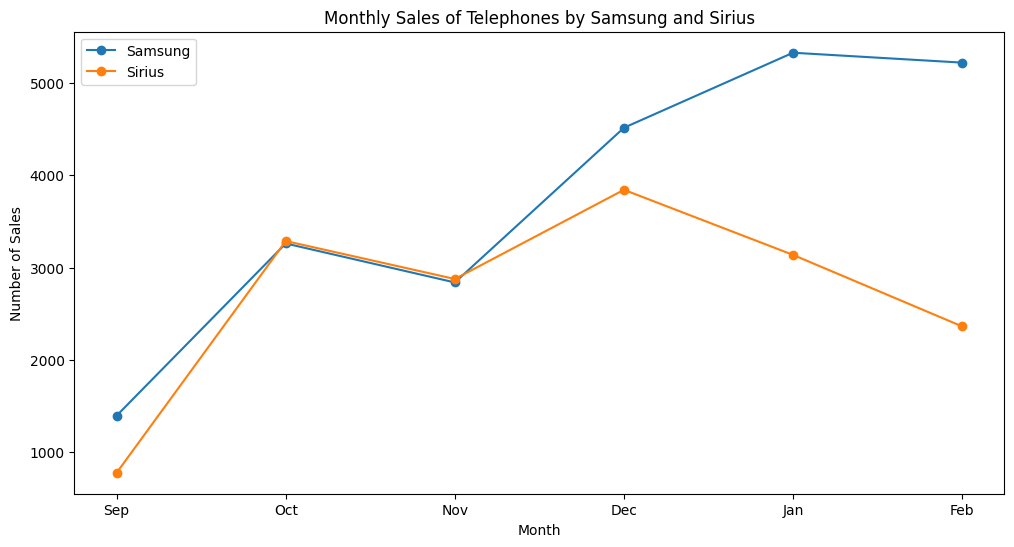

In [ ]:
# samsung, sirius telephone 월별 매출 비교

samsung_purchase_data = df2[(df2['brand'] == 'samsung') & (df2['event_type'] == 'purchase')]
sirius_purchase_data = df2[(df2['brand'] == 'sirius') & (df2['event_type'] == 'purchase')]
samsung_purchase_data['month']=samsung_purchase_data['event_time'].dt.month
sirius_purchase_data['month']=sirius_purchase_data['event_time'].dt.month

samsung_purchase_data

# 'desired_order' 변수를 먼저 정의
desired_order = [9, 10, 11, 12, 1, 2]

# Samsung 전화기 월별 매출 계산
samsung_tel_month_sales = samsung_purchase_data[
    samsung_purchase_data['category_code'] == 'electronics.telephone'
].groupby('month')['price'].sum().reindex(desired_order)

# Sirius 전화기 월별 매출 계산
sirius_tel_month_sales = sirius_purchase_data[
    sirius_purchase_data['category_code'] == 'electronics.telephone'
].groupby('month')['price'].sum().reindex(desired_order)

# 시각화 설정
plt.figure(figsize=(12, 6))

# Samsung 데이터 시각화
plt.plot(range(len(samsung_tel_month_sales)), samsung_tel_month_sales.values, marker='o', label='Samsung', linestyle='-')

# Sirius 데이터 시각화
plt.plot(range(len(sirius_tel_month_sales)), sirius_tel_month_sales.values, marker='o', label='Sirius', linestyle='-')

# x축 레이블 설정 (desired_order에 기반하여 월 이름을 매핑)
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']  # 월 이름 리스트
plt.xticks(range(len(samsung_tel_month_sales)), month_labels)

plt.legend()

# 제목 및 축 이름 설정
plt.title('Monthly Sales of Telephones by Samsung and Sirius')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

```
 ▶ samsung, sirius 두 브랜드 모두 11월 이전 월매출은 비슷하다가 11월 이후로 samsung이 앞서나가는 것을 알 수 있음
 ```

##### (3) Acquistion 유입

###### (3)-1 Daily Active User

In [ ]:
# event_time 컬럼에서 날짜만 추출해서 date 컬럼 생성하기

df2['date'] = df2['event_time'].dt.date
df2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_1,hour,date
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,telephone,11,2020-09-24
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,cooler,11,2020-09-24
2,2020-09-24 11:57:27,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,unknown,11,2020-09-24
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,printer,11,2020-09-24
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,unknown,11,2020-09-24


In [ ]:
# samsung의 Daily Active User

dau_samsung = df2[df2['brand'] == 'samsung'].groupby('date')['user_id'].count().to_frame().reset_index()
dau_samsung.head()

,date,user_id
0,2020-09-24,54
1,2020-09-25,107
2,2020-09-26,98
3,2020-09-27,120
4,2020-09-28,120


In [ ]:
# sirius의 Daily Active User

dau_sirius = df2[df2['brand'] == 'sirius'].groupby('date')['user_id'].count().to_frame().reset_index()
dau_sirius.head()

,date,user_id
0,2020-09-24,53
1,2020-09-25,91
2,2020-09-26,79
3,2020-09-27,65
4,2020-09-28,97


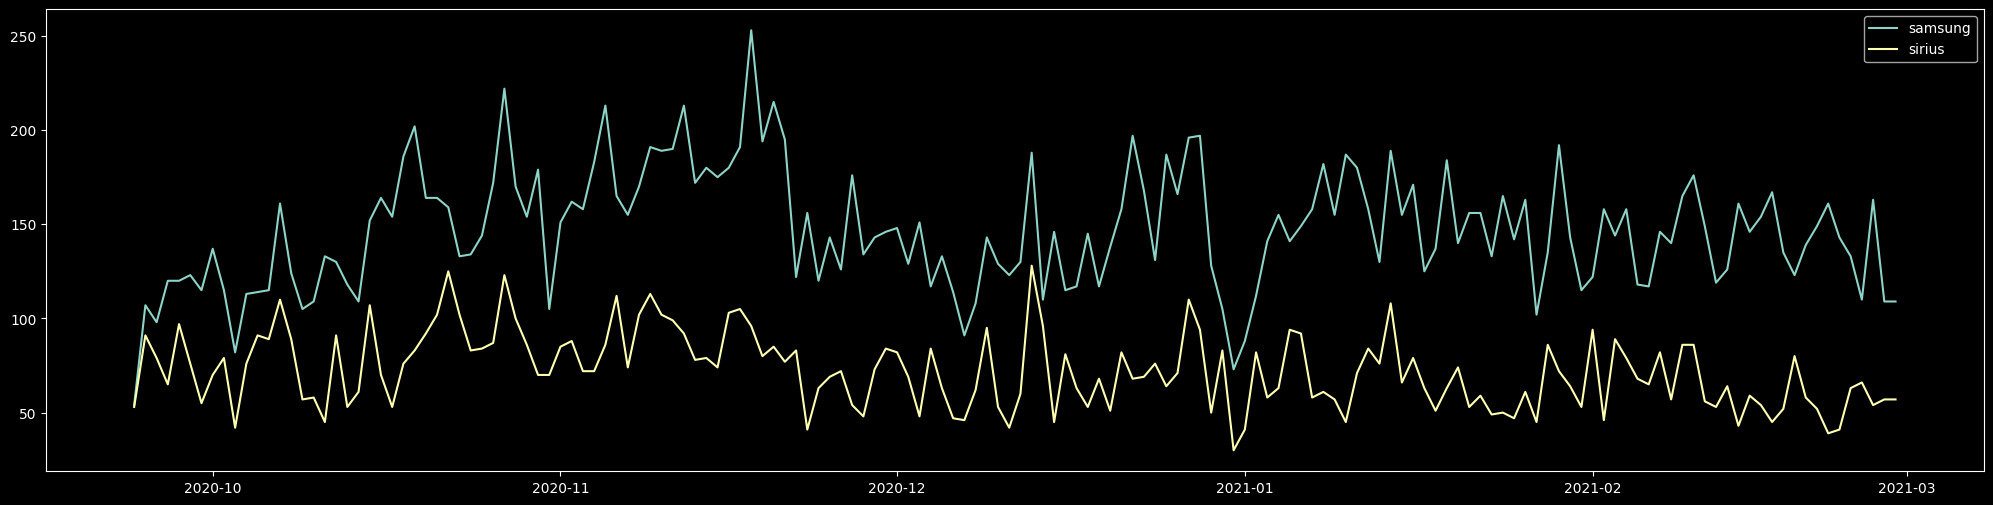

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(dau_samsung['date'], dau_samsung['user_id'], label='samsung');
plt.gcf().set_size_inches(25, 6)

plt.plot(dau_sirius['date'], dau_sirius['user_id'], label='sirius');
plt.gcf().set_size_inches(25, 6)

plt.legend()

```
▶ 활성유저 수치 samsung이 높음.
▶ 반면 sirius는 활성유저는 낮지만 판매량에서 samsung을 압도함.
```

##### (4) Activation 활성화
* 시간 단위로 활성화 유저를 분석했을 때 연관성을 짓기 어려움
 * 이유 분석 → 제품 특성상 시간단위 활성화보단 월별 활성화 유저로 보는 것이 적합하다고 판단!

###### (4)-1.samsung, sirius 시간별 전환율

In [ ]:
# event_time 컬럼에서 시간만 추출해서 hour 컬럼 생성하기

df2['hour'] = df2['event_time'].dt.hour
df2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_1,hour,date
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,telephone,11,2020-09-24
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,cooler,11,2020-09-24
2,2020-09-24 11:57:27,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,unknown,11,2020-09-24
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,printer,11,2020-09-24
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,unknown,11,2020-09-24


In [ ]:
# samsung의 각 시간별 event_type 갯수

event_type_by_hour_samsung = df2[df2['brand'] == 'samsung'].pivot_table(index = 'hour', columns = 'event_type', aggfunc = 'size')
event_type_by_hour_samsung

event_type,cart,purchase,view
hour,,,
0,12,6,257
1,8,15,255
2,17,8,310
3,14,12,420
4,21,10,557
5,39,22,749
6,38,38,898
7,41,29,1111
8,52,33,1140


In [ ]:
# samsung의 view -> purchase 전환율 계산

event_type_by_hour_samsung['conversion_rate'] = event_type_by_hour_samsung['purchase'] / event_type_by_hour_samsung['view'] * 100
event_type_by_hour_samsung = event_type_by_hour_samsung.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
event_type_by_hour_samsung


event_type,cart,purchase,view,conversion_rate
hour,,,,
0,12,6,257,2.334630
1,8,15,255,5.882353
2,17,8,310,2.580645
3,14,12,420,2.857143
4,21,10,557,1.795332
5,39,22,749,2.937250
6,38,38,898,4.231626
7,41,29,1111,2.610261
8,52,33,1140,2.894737


In [ ]:
# sirius의 각 시간별 event_type 갯수

event_type_by_hour_sirius = df2[df2['brand'] == 'sirius'].pivot_table(index = 'hour', columns = 'event_type', aggfunc = 'size')
event_type_by_hour_sirius

event_type,cart,purchase,view
hour,,,
0,8,7,90
1,15,12,126
2,10,6,124
3,13,16,164
4,17,18,229
5,28,15,363
6,51,41,505
7,49,35,532
8,64,49,631


In [ ]:
# sirius의 view -> purchase 전환율 계산

event_type_by_hour_sirius['conversion_rate'] = event_type_by_hour_sirius['purchase'] / event_type_by_hour_sirius['view'] * 100
event_type_by_hour_sirius = event_type_by_hour_sirius.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
event_type_by_hour_sirius

event_type,cart,purchase,view,conversion_rate
hour,,,,
0,8,7,90,7.777778
1,15,12,126,9.523810
2,10,6,124,4.838710
3,13,16,164,9.756098
4,17,18,229,7.860262
5,28,15,363,4.132231
6,51,41,505,8.118812
7,49,35,532,6.578947
8,64,49,631,7.765452


###### (4)-2.samsung, sirius 월별 전환율

In [ ]:
df2['month']=df2['event_time'].dt.month

In [ ]:
# samsung의 월별 event_type 갯수

samsung_month_type= df2[(df2['brand']=='samsung')&(df2['category_1']=='telephone')].pivot_table(index='month',columns='event_type', aggfunc='size')
samsung_month_type

event_type,cart,purchase,view
month,,,
1,88,61,1992
2,85,67,1773
9,7,6,276
10,60,36,1665
11,63,49,1937
12,75,53,1662


In [ ]:
# samsung의 view -> purchase 전환율 계산

samsung_month_type['conversion_rate']=samsung_month_type['purchase']/samsung_month_type['view']*100
samsung_month_type = samsung_month_type.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
samsung_month_type

event_type,cart,purchase,view,conversion_rate
month,,,,
1,88,61,1992,3.062249
2,85,67,1773,3.778906
9,7,6,276,2.173913
10,60,36,1665,2.162162
11,63,49,1937,2.529685
12,75,53,1662,3.188929


In [ ]:
# sirius의 월별 event_type 갯수

sirius_month_type= df2[(df2['brand']=='sirius')&(df2['category_1']=='telephone')].pivot_table(index='month',columns='event_type', aggfunc='size')
sirius_month_type

event_type,cart,purchase,view
month,,,
1,143,136,1387
2,150,106,1236
9,41,34,353
10,153,136,1824
11,168,130,1822
12,181,155,1511


In [ ]:
# sirius의 view -> purchase 전환율 계산

sirius_month_type['conversion_rate']=sirius_month_type['purchase']/sirius_month_type['view']*100
sirius_month_type = sirius_month_type.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
sirius_month_type

event_type,cart,purchase,view,conversion_rate
month,,,,
1,143,136,1387,9.805335
2,150,106,1236,8.576052
9,41,34,353,9.631728
10,153,136,1824,7.456140
11,168,130,1822,7.135016
12,181,155,1511,10.258107


```
▶ samsung은 2월, sirius는 12월이 전환률이 가장 높게 나왔음
▶ 월별 전환율을 고려하여 telephone 월별 마케팅 및 이벤트를 실시하면 view에서 purchase까지 이어지는 전환율이 높아질 것으로 보임.
```

#### 세부 분석 : 2. tablet 시장 확인

##### (1) 매출 분석

In [ ]:
# samsumg의 매출 2위였던 제품 = tablet
# tablet의 매출이 가장 높은 브랜드 Top

df2[(df2['category_1'] == 'tablet') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(price=('price','sum')).sort_values('price', ascending=False).head(6)

price
category_1 brand            
tablet     xiaomi   18409.79
           samsung  11482.47
           digma     7382.33
           irbis     5608.85
           unknown   3747.01
           wacom     2622.47

```
▶ category_1이 tablet이면서 매출이 높은 Top6   
    1위 : xiaomi  
    2위 : samsung  
    3위 : digma  
    4위 : irbis  
    5위 : unknown  
    6위 : wacom
```

##### (2) 판매량 분석

In [ ]:
# tablet 판매량이 가장 높은 브랜드 Top5

df2[(df2['category_1'] == 'tablet') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(count=('category_1','count'),avg_price=('price','mean')).sort_values('count', ascending=False).head(6)

count   avg_price
category_1 brand                     
tablet     unknown    286   13.101434
           samsung    218   52.671881
           digma       75   98.431067
           xiaomi      65  283.227538
           irbis       47  119.337234
           sirius      33   15.600909

```
▶ category_1이 tablet이면서 매출이 높은 Top6   
    1위 : unknown  
    2위 : samsung  
    3위 : digma  
    4위 : xiaomi  
    5위 : irbis  
    6위 : sirius
```

```
▶ 태블릿 시장에서 samsung의 판매량이 xiaomi의 판매량보다  높음
    * 근데 왜 수익은 xiaomi가 더 높을까?
```

In [ ]:
df2[(df2['category_1'] == 'tablet') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(count=('category_1','count'),sales=('price','sum'),avg_price=('price','mean')).sort_values('sales', ascending=False).head(6)

count     sales   avg_price
category_1 brand                               
tablet     xiaomi      65  18409.79  283.227538
           samsung    218  11482.47   52.671881
           digma       75   7382.33   98.431067
           irbis       47   5608.85  119.337234
           unknown    286   3747.01   13.101434
           wacom       13   2622.47  201.728462

In [ ]:
# 판매된 tablet의 평균 단가

df2[(df2['category_1'] == 'tablet') & (df2['event_type'] == 'purchase')]['price'].mean()

65.13727716727716

```
▶ xiaomi의 tablet 평균 단가는 약 283으로 높은 반면, samsung의 약 53임.
▶ tablet의 평균 단가는 65임.
  
▶ xiaomi의 가격이 samsung보다 높다는 사실을 볼 때,
    xiaomi의 태블릿이 수익성이 좋은 제품임을 유추해 볼 수 있음.
```

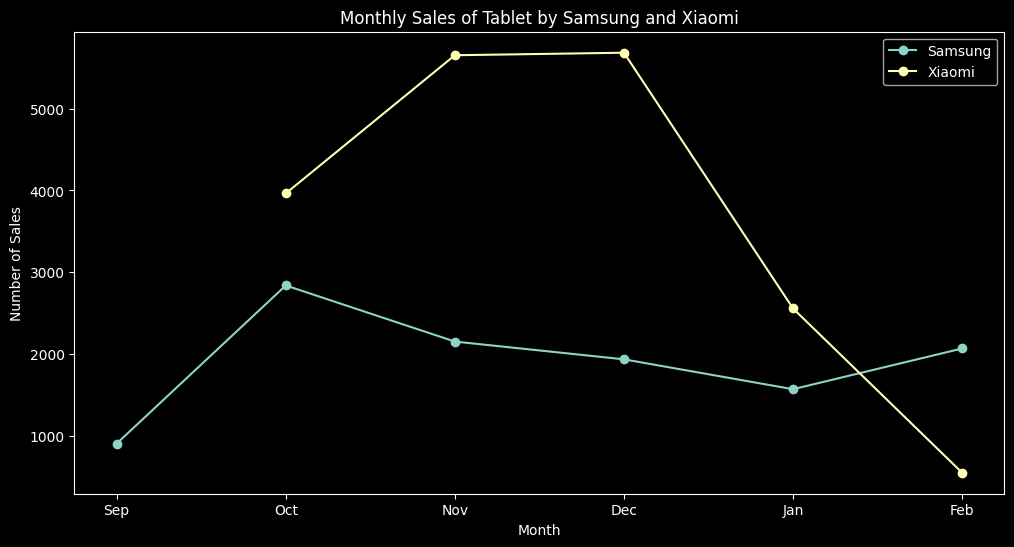

In [ ]:
# xiaomi, samsung tablet 월별 매출 비교

xiaomi_purchase_data = df2[(df2['brand'] == 'xiaomi') & (df2['event_type'] == 'purchase')]
xiaomi_purchase_data['month']=xiaomi_purchase_data['event_time'].dt.month

# 'desired_order' 변수를 먼저 정의
desired_order = [9, 10, 11, 12, 1, 2]

# Samsung tablet 월별 매출 계산
samsung_tablet_month_sales = samsung_purchase_data[
    samsung_purchase_data['category_1'] == 'tablet'
].groupby('month')['price'].sum().reindex(desired_order)

# xiaomi tablet 월별 매출 계산
xiaomi_tablet_month_sales = xiaomi_purchase_data[
    xiaomi_purchase_data['category_1'] == 'tablet'
].groupby('month')['price'].sum().reindex(desired_order)

# 시각화 설정
plt.figure(figsize=(12, 6))

# Samsung 데이터 시각화
plt.plot(range(len(samsung_tablet_month_sales)), samsung_tablet_month_sales.values, marker='o', label='Samsung', linestyle='-')

# Sirius 데이터 시각화
plt.plot(range(len(xiaomi_tablet_month_sales)), xiaomi_tablet_month_sales.values, marker='o', label='Xiaomi', linestyle='-')

# x축 레이블 설정 (desired_order에 기반하여 월 이름을 매핑)
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']  # 월 이름 리스트
plt.xticks(range(len(samsung_tablet_month_sales)), month_labels)

plt.legend()

# 제목 및 축 이름 설정
plt.title('Monthly Sales of Tablet by Samsung and Xiaomi')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

In [ ]:
xiaomi_purchase_data[(xiaomi_purchase_data['category_1']=='tablet')&(xiaomi_purchase_data['month']==2)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_1,hour,date,month
767207,2021-02-08 17:28:52,purchase,1559417,2144415922872385653,electronics.tablet,xiaomi,268.11,1515915625603042215,VodajjK0V6,tablet,17,2021-02-08,2
838632,2021-02-20 12:37:59,purchase,1578612,2144415922872385653,electronics.tablet,xiaomi,284.30,1515915625423788629,tOZhOUOu8c,tablet,12,2021-02-20,2


```
▶ 결론
    * samsung, xiaomi 월 매출로 봤을 때 xiaomi는 12월 이후 매출 급감, 반면 samsung은 매출이 10월부터 감소하다가 1월부터 상승하는 것을 볼 수 있음.
    * 다만 xiaomi 2월 매출에 2개만 기록되어 있는 것을 보았을 때 신뢰성에 유의할 것.
```

##### (3) Acquistion 유입


######   (3)-1. Daily Active User

In [ ]:
# samsung의 Daily Active User

dau_samsung = df2[df2['brand'] == 'samsung'].groupby('date')['user_id'].count().to_frame().reset_index()
dau_samsung.head()

,date,user_id
0,2020-09-24,54
1,2020-09-25,107
2,2020-09-26,98
3,2020-09-27,120
4,2020-09-28,120


In [ ]:
# xiaomi의 Daily Active User

dau_xiaomi = df2[df2['brand'] == 'xiaomi'].groupby('date')['user_id'].count().to_frame().reset_index()
dau_xiaomi.head()

,date,user_id
0,2020-09-24,25
1,2020-09-25,29
2,2020-09-26,45
3,2020-09-27,20
4,2020-09-28,40


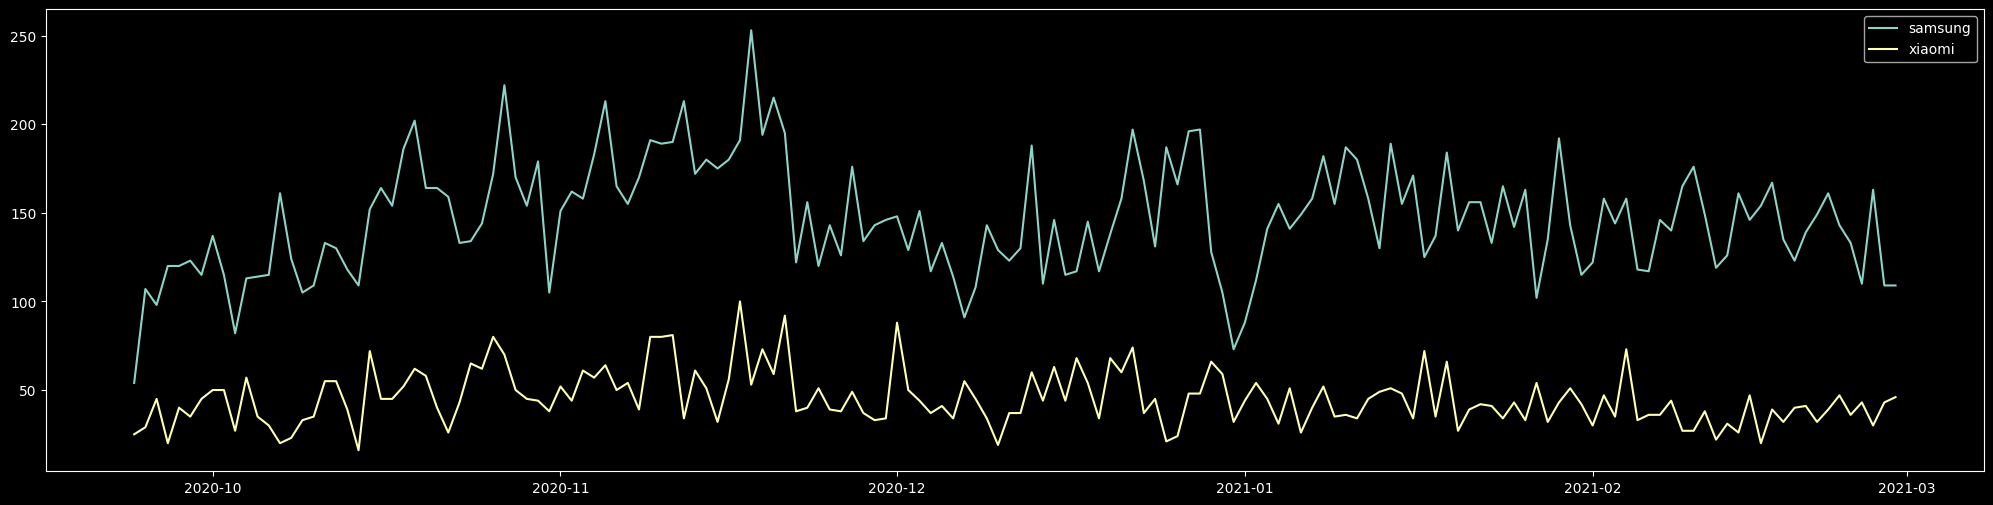

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(dau_samsung['date'], dau_samsung['user_id'], label='samsung');
plt.gcf().set_size_inches(25, 6)

plt.plot(dau_xiaomi['date'], dau_xiaomi['user_id'], label='xiaomi');
plt.gcf().set_size_inches(25, 6)

plt.legend()

```
▶ 활성유저 수치 역시 samsung이 높음.
    - 반면 xiaomi는 상대적으로 적은 고객이지만 태블릿에 대해서는 고가 제품을 구매하는 특징을 발견할 수 있음.
```

##### (4) Activation 활성화


###### (4)-1. samsung, xiaomi 월별 전환율

In [ ]:
# samsung의 월별 event_type 갯수

samsung_month_type= df2[(df2['brand']=='samsung')&(df2['category_1']=='tablet')].pivot_table(index='month',columns='event_type', aggfunc='size')
samsung_month_type

event_type,cart,purchase,view
month,,,
1,44,34,647
2,40,38,435
9,13,16,112
10,59,54,704
11,56,48,841
12,33,28,558


In [ ]:
# samsung의 view -> purchase 전환율 계산

samsung_month_type['conversion_rate']=samsung_month_type['purchase']/samsung_month_type['view']*100
samsung_month_type = samsung_month_type.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
samsung_month_type

event_type,cart,purchase,view,conversion_rate
month,,,,
1,44,34,647,5.255023
2,40,38,435,8.735632
9,13,16,112,14.285714
10,59,54,704,7.670455
11,56,48,841,5.707491
12,33,28,558,5.017921


In [ ]:
# xiaomi의 월별 event_type 갯수

xiaomi_month_type= df2[(df2['brand']=='xiaomi')&(df2['category_1']=='tablet')].pivot_table(index='month',columns='event_type',aggfunc='size')
xiaomi_month_type.fillna(0,inplace=True)
xiaomi_month_type

event_type,cart,purchase,view
month,,,
1,19.0,9.0,297.0
2,10.0,2.0,189.0
9,4.0,0.0,57.0
10,32.0,14.0,360.0
11,39.0,20.0,450.0
12,24.0,20.0,356.0


In [ ]:
# xiaomi의 view -> purchase 전환율 계산

xiaomi_month_type['conversion_rate']= xiaomi_month_type['purchase']/xiaomi_month_type['view']*100
xiaomi_month_type = xiaomi_month_type.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
xiaomi_month_type

event_type,cart,purchase,view,conversion_rate
month,,,,
1,19.000000,9.000000,297.000000,3.030303
2,10.000000,2.000000,189.000000,1.058201
9,4.000000,0.000000,57.000000,0.000000
10,32.000000,14.000000,360.000000,3.888889
11,39.000000,20.000000,450.000000,4.444444
12,24.000000,20.000000,356.000000,5.617978


```
▶ samsung은 9월 xiaomi는 12월이 전환률이 가장 높게 나왔음
▶ 이를 고려하여 tablet 월별 마케팅 및 이벤트를 실시하면 view에서 purchase까지 이어지는 전환율이 높아질 것으로 보임.
```

#### 세부분석 : 3. tv 시장 확인

##### (1) 매출 분석

In [ ]:
# samsumg의 매출 상위권이었던 제품 = tv
# category_1가 tv의 매출이 가장 높은 브랜드 Top

df2[(df2['category_1'] == 'tv') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(price=('price','sum')).sort_values('price', ascending=False).head(6)

price
category_1 brand             
tv         starwind  14108.56
           bbk       13174.14
           samsung    7641.54
           lg         6852.35
           hyundai    5079.54
           jvc        3822.34

```
▶ tv 시장의 매출은 samsung보다 starwind와 bbk가 우위에 있음
```

##### (2) 판매량 분석

In [ ]:
# category_code가 tv의 판매량이 가장 높은 브랜드 Top5

df2[(df2['category_1'] == 'tv') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(count=('category_1','count'),avg_price=('price','mean')).sort_values('count', ascending=False).head(7)

count   avg_price
category_1 brand                      
tv         bbk         134   98.314478
           starwind    121  116.599669
           unknown      29   90.132414
           hyundai      29  175.156552
           jvc          23  166.188696
           lg           14  489.453571
           samsung      11  694.685455

```
▶ samsung의 tv 판매량은 7위임을 알 수 있다.
```

In [ ]:
# 각 브랜드 별 평균 가격

df2[(df2['category_1'] == 'tv') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(count=('category_1','count'),sales=('price','sum'),avg_price=('price','mean')).sort_values('sales', ascending=False).head(6)

count     sales   avg_price
category_1 brand                                
tv         starwind    121  14108.56  116.599669
           bbk         134  13174.14   98.314478
           samsung      11   7641.54  694.685455
           lg           14   6852.35  489.453571
           hyundai      29   5079.54  175.156552
           jvc          23   3822.34  166.188696

```
▶ 중간 결론
    * samsung의 tv 평균 가격(약 695)이 가장 높음
    * 판매 수량에서 starwind와 bbk가 앞서지만, 이들의 평균 가격(각각 93, 116)이 이 순위권 밖인 점을 감안하면 '저가 공세'라고 추정함.
```

##### (3) Acquistion 유입

###### (3)-1. Daily Active User

In [ ]:
# starwind의 Daily Active User

dau_starwind = df2[df2['brand'] == 'starwind'].groupby('date')['user_id'].count().to_frame().reset_index()
dau_starwind.head()

,date,user_id
0,2020-09-24,4
1,2020-09-25,19
2,2020-09-26,8
3,2020-09-27,11
4,2020-09-28,28


In [ ]:
# bbk의 Daily Active User

dau_bbk = df2[df2['brand'] == 'bbk'].groupby('date')['user_id'].count().to_frame().reset_index()
dau_bbk.head()

,date,user_id
0,2020-09-24,15
1,2020-09-25,33
2,2020-09-26,20
3,2020-09-27,23
4,2020-09-28,32


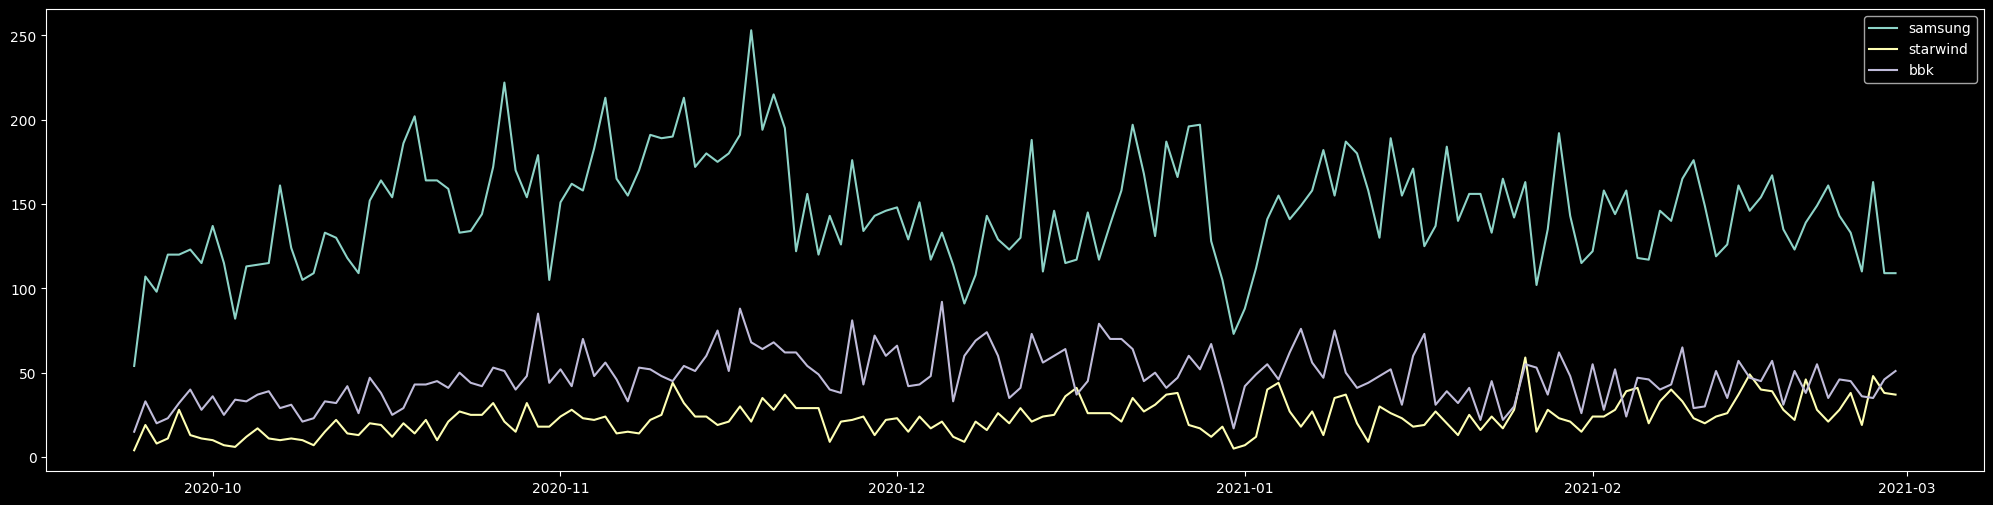

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(dau_samsung['date'], dau_samsung['user_id'], label='samsung');
plt.gcf().set_size_inches(25, 6)

plt.plot(dau_starwind['date'], dau_starwind['user_id'], label='starwind');
plt.gcf().set_size_inches(25, 6)

plt.plot(dau_bbk['date'], dau_bbk['user_id'], label='bbk');
plt.gcf().set_size_inches(25, 6)

plt.legend()

```
▶ 결론
    * 활성유저 면에서도 samsung 압승임
    * 이는 "samsung TV의 고객 인식이 경쟁력 있다"라고 볼 수 있는 지점임
```

##### (4) Activation 활성화

###### (4)-1. starwind, bbk, samsung 월별 전환율

In [ ]:
# starwind의 월별 event_type 갯수

starwind_month_type= df2[(df2['brand']=='starwind')&(df2['category_1']=='tv')].pivot_table(index='month',columns='event_type', aggfunc='size')
starwind_month_type.fillna(0,inplace=True)
starwind_month_type

event_type,cart,purchase,view
month,,,
1,41.0,35.0,584.0
2,54.0,35.0,732.0
9,5.0,0.0,70.0
10,20.0,13.0,381.0
11,30.0,21.0,555.0
12,50.0,17.0,582.0


In [ ]:
# starwind의 view -> purchase 전환율 계산

starwind_month_type['conversion_rate']=starwind_month_type['purchase']/starwind_month_type['view']*100
starwind_month_type = starwind_month_type.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
starwind_month_type

event_type,cart,purchase,view,conversion_rate
month,,,,
1,41.000000,35.000000,584.000000,5.993151
2,54.000000,35.000000,732.000000,4.781421
9,5.000000,0.000000,70.000000,0.000000
10,20.000000,13.000000,381.000000,3.412073
11,30.000000,21.000000,555.000000,3.783784
12,50.000000,17.000000,582.000000,2.920962


In [ ]:
# bbk의 월별 event_type 갯수

bbk_month_type= df2[(df2['brand']=='bbk')&(df2['category_1']=='tv')].pivot_table(index='month',columns='event_type', aggfunc='size')
bbk_month_type.fillna(0,inplace=True)
bbk_month_type

event_type,cart,purchase,view
month,,,
1,54.0,27.0,874.0
2,52.0,37.0,746.0
9,3.0,0.0,116.0
10,20.0,18.0,662.0
11,28.0,12.0,1017.0
12,55.0,40.0,1081.0


In [ ]:
# bbk의 view -> purchase 전환율 계산

bbk_month_type['conversion_rate']=bbk_month_type['purchase']/bbk_month_type['view']*100
bbk_month_type = bbk_month_type.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
bbk_month_type

event_type,cart,purchase,view,conversion_rate
month,,,,
1,54.000000,27.000000,874.000000,3.089245
2,52.000000,37.000000,746.000000,4.959786
9,3.000000,0.000000,116.000000,0.000000
10,20.000000,18.000000,662.000000,2.719033
11,28.000000,12.000000,1017.000000,1.179941
12,55.000000,40.000000,1081.000000,3.700278


In [ ]:
# samsung의 월별 event_type 갯수

samsung_month_type= df2[(df2['brand']=='samsung')&(df2['category_1']=='tv')].pivot_table(index='month',columns='event_type', aggfunc='size')
samsung_month_type.fillna(0,inplace=True)
samsung_month_type

event_type,cart,purchase,view
month,,,
1,7.0,2.0,334.0
2,8.0,4.0,310.0
9,0.0,0.0,49.0
10,4.0,3.0,328.0
11,6.0,2.0,497.0
12,9.0,0.0,534.0


In [ ]:
# samsung의 view -> purchase 전환율 계산

samsung_month_type['conversion_rate']=samsung_month_type['purchase']/samsung_month_type['view']*100
samsung_month_type = samsung_month_type.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
samsung_month_type

event_type,cart,purchase,view,conversion_rate
month,,,,
1,7.000000,2.000000,334.000000,0.598802
2,8.000000,4.000000,310.000000,1.290323
9,0.000000,0.000000,49.000000,0.000000
10,4.000000,3.000000,328.000000,0.914634
11,6.000000,2.000000,497.000000,0.402414
12,9.000000,0.000000,534.000000,0.000000


```
▶ tv 매출 1위인 starwind는 1월, 2위인 bbk는 2월이 전환율이 높았음.
▶ 7위인 samsung은 2월이 가장 높았음.
▶ 이를 고려하여 tv 월별 마케팅 및 이벤트를 실시하면 view에서 purchase까지 이어지는 전환율이 높아질 것으로 보임.
```

## A5.Unknown 분석

In [ ]:
samsung_data=df2[df2['brand']=='samsung']
samsung_data[samsung_data['category_code']=='unknown']['category_id'].unique()

array([2144415921815421016, 2144415921001726020, 2144415942115852920,
       2144415921169498184, 2144415921505042512, 2144415923535085701,
       2144415940379411019, 2144415922201296994, 2144415928333369601,
       2144415937552450047, 2144415943516750494, 2144415921337270348,
       2144415923879018637, 2144415921463099471, 2144415944724710078,
       2144415933341368710, 2144415927158964449])

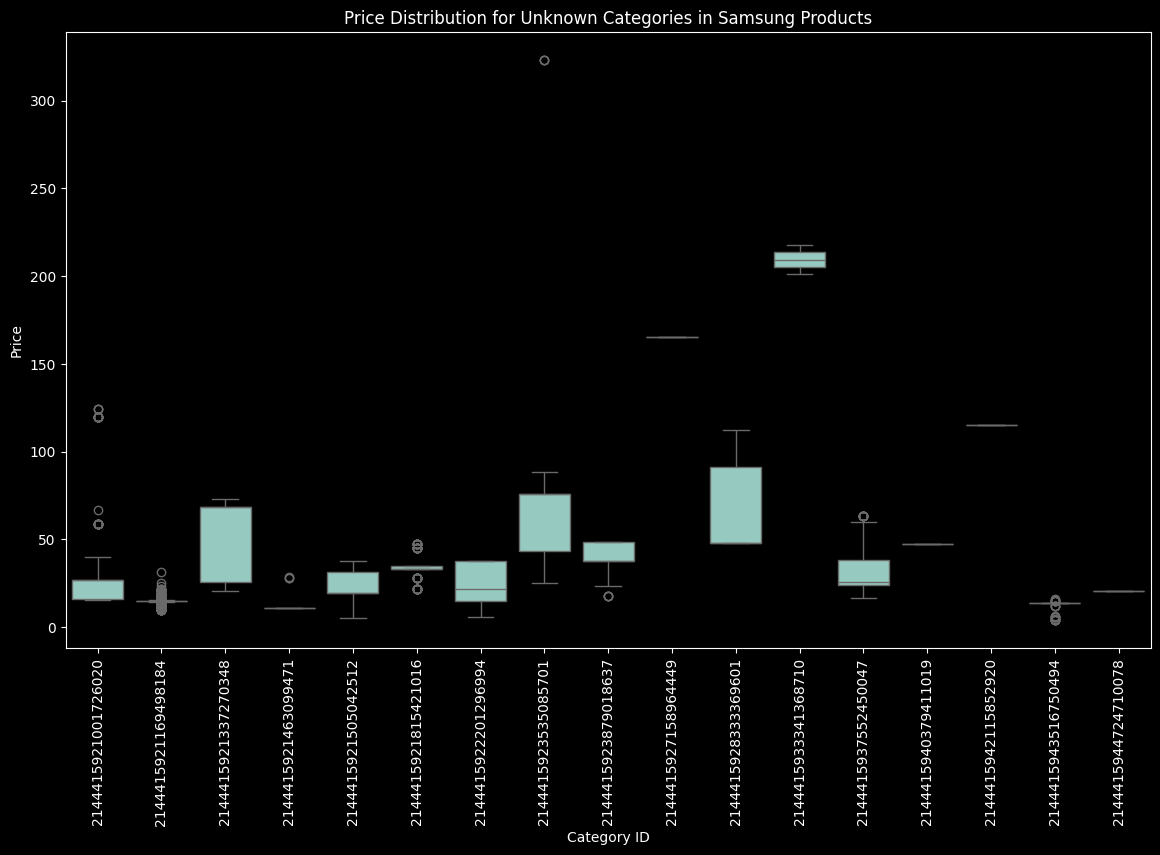

In [ ]:
# 'unknown' category_code에 해당하는 category_id별 가격 분포를 시각화하는 코드입니다.

# 해당 category_id 리스트를 정의합니다.
category_ids = [
    2144415921815421016, 2144415921001726020, 2144415942115852920,
    2144415921169498184, 2144415921505042512, 2144415923535085701,
    2144415940379411019, 2144415922201296994, 2144415928333369601,
    2144415937552450047, 2144415943516750494, 2144415921337270348,
    2144415923879018637, 2144415921463099471, 2144415944724710078,
    2144415933341368710, 2144415927158964449
]

# 'unknown' category_code와 해당 category_id에 해당하는 데이터를 필터링합니다.
unknown_categories_data = samsung_data[(samsung_data['category_code'] == 'unknown') & (samsung_data['category_id'].isin(category_ids))]

# 시각화
plt.figure(figsize=(14, 8))

# 각 category_id별로 가격 분포를 박스플롯으로 시각화합니다.
sns.boxplot(x='category_id', y='price', data=unknown_categories_data)
plt.xticks(rotation=90)  # category_id가 길기 때문에 레이블을 회전시킵니다.
plt.title('Price Distribution for Unknown Categories in Samsung Products')
plt.xlabel('Category ID')
plt.ylabel('Price')
plt.show()

```
▶  결과
    1. 가격 분포 : 대부분의 category_id에 대한 가격은 0에서 50 단위 사이에 밀집해 있는 것으로 보임. 이는 해당 category_id의 제품들이 대체로 저렴한 가격대에 속한다는 것을 의미함.

    2. 중앙값 : 각 카테고리의 중앙값이 어디에 위치하는지를 확인할 수 있으며, 이는 가격 데이터의 중앙 지점을 나타냄.

    3. 이상치 : 일부 category_id에서 보이는 이상치들은 평균적인 가격대에서 벗어난 제품들을 나타남. 예를 들어, 매우 높거나 낮은 가격으로 판매된 제품들일 수 있음.
```

## A6. 마케팅 전략

##### (1) Telephone

In [ ]:
# 상위 매출 3개 브랜드의 telephone 가격과 판매량의 관계 분석
# 'unknown' 브랜드의 'electronics.telephone' 카테고리에 해당하는 product_id별 평균 가격, 총 매출, 판매 횟수를 계산
unknown_telephone_sales = purchase_data[
    (purchase_data['category_1'] == 'telephone') &
    (purchase_data['brand'] == 'unknown')
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매 횟수
).sort_values(by='count', ascending=False)

unknown_telephone_sales.head()

,avg_price,sum_price,count
product_id,,,
3829355,32.22,17495.46,543
3632668,34.44,3995.04,116
3537322,27.62,2679.14,97
1660034,10.43,865.69,83
3829374,21.43,1521.53,71


In [ ]:

unknown_purchase_data = df2[(df2['brand'] == 'unknown') & (df2['event_type'] == 'purchase')]

unknown_lowest_price_phones = unknown_purchase_data[
    unknown_purchase_data['category_1'] == 'telephone'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매 횟수
).sort_values(by='avg_price', ascending=True).head()

unknown_lowest_price_phones

,avg_price,sum_price,count
product_id,,,
339467,1.57,1.57,1
1408929,1.57,1.57,1
731457,1.57,4.71,3
689315,1.57,3.14,2
1569684,1.57,4.71,3


In [ ]:
# 'sirius' 브랜드의 'purchase' 이벤트를 필터링하여 sirius_purchase_data를 정의
sirius_purchase_data = df2[(df2['brand'] == 'sirius') & (df2['event_type'] == 'purchase')]

# 'sirius' 브랜드의 'electronics.telephone' 카테고리 내에서 판매량, 총 매출, 평균 가격을 계산
sirius_telephone_sales = sirius_purchase_data[
    sirius_purchase_data['category_1'] == 'telephone'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='count', ascending=False)

sirius_telephone_sales.head()


,avg_price,sum_price,count
product_id,,,
1821557,16.19,1958.99,121
4013582,26.98,2320.28,86
3755038,23.48,1267.92,54
1821672,32.86,1380.12,42
1666931,19.37,677.95,35


In [ ]:
# 평균 가격이 가장 낮은 sirius 전화기 제품 조회

sirius_purchase_data = df2[(df2['brand'] == 'sirius') & (df2['event_type'] == 'purchase')]

sirius_lowest_price_phones = samsung_purchase_data[
    samsung_purchase_data['category_1'] == 'telephone'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매 횟수
).sort_values(by='avg_price', ascending=True).head()

sirius_lowest_price_phones


,avg_price,sum_price,count
product_id,,,
218977,9.37,9.37,1
347218,9.37,37.48,4
842364,9.84,59.04,6
1443701,9.84,39.36,4
1887062,16.97,33.94,2


In [ ]:
# 삼성 브랜드의 'telephone' 필터링
samsung_purchase_data = df2[(df2['brand'] == 'samsung') & (df2['event_type'] == 'purchase')]

# 'electronics.telephone' 카테고리 내에서 판매량, 총 매출, 평균 가격을 계산

samsung_telephone_sales = samsung_purchase_data[
    samsung_purchase_data['category_1'] == 'telephone'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='count', ascending=False)

samsung_telephone_sales.head()

,avg_price,sum_price,count
product_id,,,
3828891,51.33,5800.29,113
1848542,64.89,1168.02,18
4170505,34.65,415.80,12
1895739,28.08,336.96,12
1814282,89.40,894.00,10


In [ ]:
# 평균 가격이 가장 낮은 삼성 전화기 제품 조회

samsung_purchase_data = df2[(df2['brand'] == 'samsung') & (df2['event_type'] == 'purchase')]

samsung_lowest_price_phones = samsung_purchase_data[
    samsung_purchase_data['category_1'] == 'telephone'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매 횟수
).sort_values(by='avg_price', ascending=True).head()

samsung_lowest_price_phones


,avg_price,sum_price,count
product_id,,,
218977,9.37,9.37,1
347218,9.37,37.48,4
842364,9.84,59.04,6
1443701,9.84,39.36,4
1887062,16.97,33.94,2


```
▶ 결과
    * Unknown, 삼성, sirius의 telephone 가격과 판매량과의 관계를 연관지어봤을 때 가격이 무조건적으로 낮다고 잘팔리는 것은 아님.
    * 가격과 품질의 대안점을 찾아 보급형을 제조하는 것에 중점을 두는 것도 추천함.
```

##### (2) Tablet

In [ ]:
df2[(df2['category_1'] == 'tablet') & (df2['event_type'] == 'purchase')].groupby(['category_1','brand']).agg(count=('category_1','count'),sales=('price','sum'),avg_price=('price','mean')).sort_values('sales', ascending=False).head(6)

count     sales   avg_price
category_1 brand                               
tablet     xiaomi      65  18409.79  283.227538
           samsung    218  11482.47   52.671881
           digma       75   7382.33   98.431067
           irbis       47   5608.85  119.337234
           unknown    286   3747.01   13.101434
           wacom       13   2622.47  201.728462

In [ ]:
# 상위 매출 3개 브랜드 tablet 가격과 판매량 분석
# 'xiaomi' 브랜드의 'purchase' 이벤트를 필터링하여 xiaomi_purchase_data를 정의
xiaomi_purchase_data = df2[(df2['brand'] == 'xiaomi') & (df2['event_type'] == 'purchase')]

# xiaomi 판매량순 tablet 제품 조회
# 'xiaomi' 브랜드의 'tablet' 카테고리 내에서 판매량, 총 매출, 평균 가격을 계산
xiaomi_tablet_sales = xiaomi_purchase_data[
    xiaomi_purchase_data['category_1'] == 'tablet'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='count', ascending=False)

xiaomi_tablet_sales.head()

,avg_price,sum_price,count
product_id,,,
1578612,284.30,16489.40,58
1559417,268.11,1072.44,4
3506340,282.65,847.95,3


In [ ]:
# xiaomi tablet 평균 가격 낮은 제품 조회
xiaomi_tablet_sales = xiaomi_purchase_data[
    xiaomi_purchase_data['category_1'] == 'tablet'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='avg_price', ascending=True)

xiaomi_tablet_sales.head()

,avg_price,sum_price,count
product_id,,,
1559417,268.11,1072.44,4
3506340,282.65,847.95,3
1578612,284.30,16489.40,58


In [ ]:
# samsung 'tablet' 카테고리 내에서 판매량, 총 매출, 평균 가격을 계산

samsung_tablet_sales = samsung_purchase_data[
    samsung_purchase_data['category_1'] == 'tablet'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='count', ascending=False)

samsung_tablet_sales.head()

,avg_price,sum_price,count
product_id,,,
3829572,57.62,3860.54,67
957591,18.41,570.71,31
3616980,86.16,2412.48,28
3829009,53.90,1293.60,24
3616976,57.13,914.08,16


In [ ]:
# samsung tablet 평균 가격 낮은 제품 조회
samsung_tablet_sales = samsung_purchase_data[
    samsung_purchase_data['category_1'] == 'tablet'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='avg_price', ascending=True)

samsung_tablet_sales.head()

,avg_price,sum_price,count
product_id,,,
1428319,16.67,183.37,11
957591,18.41,570.71,31
1428320,18.57,278.55,15
1428321,19.05,209.55,11
1660263,47.49,332.43,7


In [ ]:
digma_purchase_data = df2[(df2['brand'] == 'digma') & (df2['event_type'] == 'purchase')]

# 'digma' 브랜드의 'tablet' 카테고리 내에서 판매량, 총 매출, 평균 가격을 계산
digma_tablet_sales = digma_purchase_data[
    digma_purchase_data['category_1'] == 'tablet'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='count', ascending=False)

digma_tablet_sales.head()

,avg_price,sum_price,count
product_id,,,
4156062,107.79,3664.86,34
3828304,73.83,664.47,9
3787756,59.98,479.84,8
1716039,256.81,1027.24,4
3791437,72.79,291.16,4


In [ ]:
# digma tablet 평균 가격 낮은 제품 조회
digma_tablet_sales = digma_purchase_data[
    digma_purchase_data['category_1'] == 'tablet'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='avg_price', ascending=True)

digma_tablet_sales.head()

,avg_price,sum_price,count
product_id,,,
3787756,59.98,479.84,8
889045,63.02,126.04,2
1521842,64.60,129.20,2
3648338,66.27,198.81,3
1030146,67.79,135.58,2


```
▶ 결과
    * Xiaomi, 삼성, digma의 telephone 가격과 판매량과의 관계를 연관지어봤을 때 가격이 무조건적으로 낮다고 잘팔리는 것은 아님.
    * 예외로 Xiaomi의 경우 최고가의 tablet이 판매량이 가장 높았음.
```

##### (3) Tv

In [ ]:
# TV 카테고리 내에서 판매량이 높은 브랜드의 판매량, 평균 가격, 총 매출 계산

tv_sales_data = purchase_data[
    purchase_data['category_code'] == 'electronics.video.tv'
].groupby('brand').agg(
    count=('product_id', 'count'),
    avg_price=('price', 'mean'),
    sales=('price', 'sum')
).sort_values(by='count', ascending=False)

# 상위 5개 브랜드에 대한 정보 출력
tv_sales_data.head()

,count,avg_price,sales
brand,,,
bbk,134,98.314478,13174.14
starwind,121,116.599669,14108.56
unknown,29,90.132414,2613.84
hyundai,29,175.156552,5079.54
jvc,23,166.188696,3822.34


In [ ]:
# 'tv' 카테고리 내의 제품들의 평균 가격 계산

avg_price_tv = purchase_data[
    purchase_data['category_1'] == 'tv'
]['price'].mean()

avg_price_tv

149.06917737789203

In [ ]:
# 상위 매출 3개 브랜드 tv 가격과 판매량 분석
# 'bbk' 브랜드의 'purchase' 이벤트를 필터링하여 bbk_purchase_data를 정의

# bbk 판매량순 tv 제품 조회
bbk_purchase_data = df2[(df2['brand'] == 'bbk') & (df2['event_type'] == 'purchase')]

# 'bbk' 브랜드의 'electronics.tv' 카테고리 내에서 판매량, 총 매출, 평균 가격을 계산
bbk_tv_sales = bbk_purchase_data[
    bbk_purchase_data['category_1'] == 'tv'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='count', ascending=False)

bbk_tv_sales.head()

,avg_price,sum_price,count
product_id,,,
3828501,87.16,9587.60,110
1428972,88.73,1064.76,12
4047193,281.21,1406.05,5
1633622,121.87,365.61,3
4155159,224.76,449.52,2


In [ ]:
# 평균 가격이 가장 낮은 bbk tv 제품 조회
bbk_tv_sales = bbk_purchase_data[
    bbk_purchase_data['category_1'] == 'tv'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='avg_price', ascending=True)

bbk_tv_sales.head()

,avg_price,sum_price,count
product_id,,,
3828501,87.16,9587.60,110
1428972,88.73,1064.76,12
1633620,121.87,121.87,1
1633622,121.87,365.61,3
3720405,178.73,178.73,1


In [ ]:
# starwind 판매량순 tv 제품 조회
starwind_purchase_data = df2[(df2['brand'] == 'starwind') & (df2['event_type'] == 'purchase')]

# 'starwind' 브랜드의 'electronics.tv' 카테고리 내에서 판매량, 총 매출, 평균 가격을 계산
starwind_tv_sales = starwind_purchase_data[
    starwind_purchase_data['category_1'] == 'tv'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='count', ascending=False)

starwind_tv_sales.head()

,avg_price,sum_price,count
product_id,,,
1168166,105.87,4658.28,44
1715907,80.03,1920.72,24
4079414,87.46,1311.90,15
4102744,197.94,2375.28,12
1012544,109.84,988.56,9


In [ ]:
# 평균 가격이 가장 낮은 starwind tv 제품 조회
starwind_tv_sales = starwind_purchase_data[
   starwind_purchase_data['category_1'] == 'tv'
].groupby('product_id').agg(
    avg_price=('price', 'mean'),  # 평균 가격
    sum_price=('price', 'sum'),   # 총 매출
    count=('product_id', 'count')  # 판매량
).sort_values(by='avg_price', ascending=True)

starwind_tv_sales.head()

,avg_price,sum_price,count
product_id,,,
1715907,80.03,1920.72,24
4079414,87.46,1311.90,15
1168166,105.87,4658.28,44
1012544,109.84,988.56,9
1549921,133.65,1069.20,8


```
▶ 결과
    * bbk, starwind의 tv 가격과 판매량과의 관계를 연관지어봤을 때 매출 2위인 bbk의 경우 최저가의 tv이 판매량이 가장 높았음.
    * starwind의 경우 해당되지 않았기에 tv 또한 가격과 판매량과의 상관 관계를 짓기 어려움.
```

## A7. 복수구매율

In [ ]:
# 각 사용자가 각 제품을 몇 번 구매했는지 집계
purchase_count = df2.groupby(['user_id', 'product_id']).size().reset_index(name='purchase_count')

# 각 제품에 대해 구매한 사용자 중복 제거하여 재구매 횟수 계산
repurchase_count = purchase_count.groupby('product_id').apply(lambda x: (x['purchase_count'] > 1).sum()).reset_index(name='repurchase_count')

# 전체 구매 횟수 계산
total_purchase_count = len(purchase_count)

# 복수구매율 계산
repurchase_rate = repurchase_count['repurchase_count'].sum() / total_purchase_count
repurchase_rate

0.24051940492637033

In [ ]:
# samsung 34% 전체 평균(24%)에 비해 1.4배 높음 → 이유? 평점이 있으면 좋았을 거 같음
# 각 사용자가 각 제품을 몇 번 구매했는지 집계
s_purchase_count = samsung_purchase_data.groupby(['user_id', 'product_id']).size().reset_index(name='purchase_count')

# 각 제품에 대해 구매한 사용자 중복 제거하여 재구매 횟수 계산
s_repurchase_count = s_purchase_count.groupby('product_id').apply(lambda x: (x['purchase_count'] > 1).sum()).reset_index(name='repurchase_count')

# 전체 구매 횟수 계산
total_purchase_count = len(s_purchase_count)

# 복수구매율 계산
repurchase_rate = s_repurchase_count['repurchase_count'].sum() / total_purchase_count
repurchase_rate

0.344

```
▶ 삼성의 재구매율이 다른 brand에 비해 1.4배 높지만 그 이유를 분석하는 것에서 데이터의 부족함을 느낌.
```

## A8. 대시보드

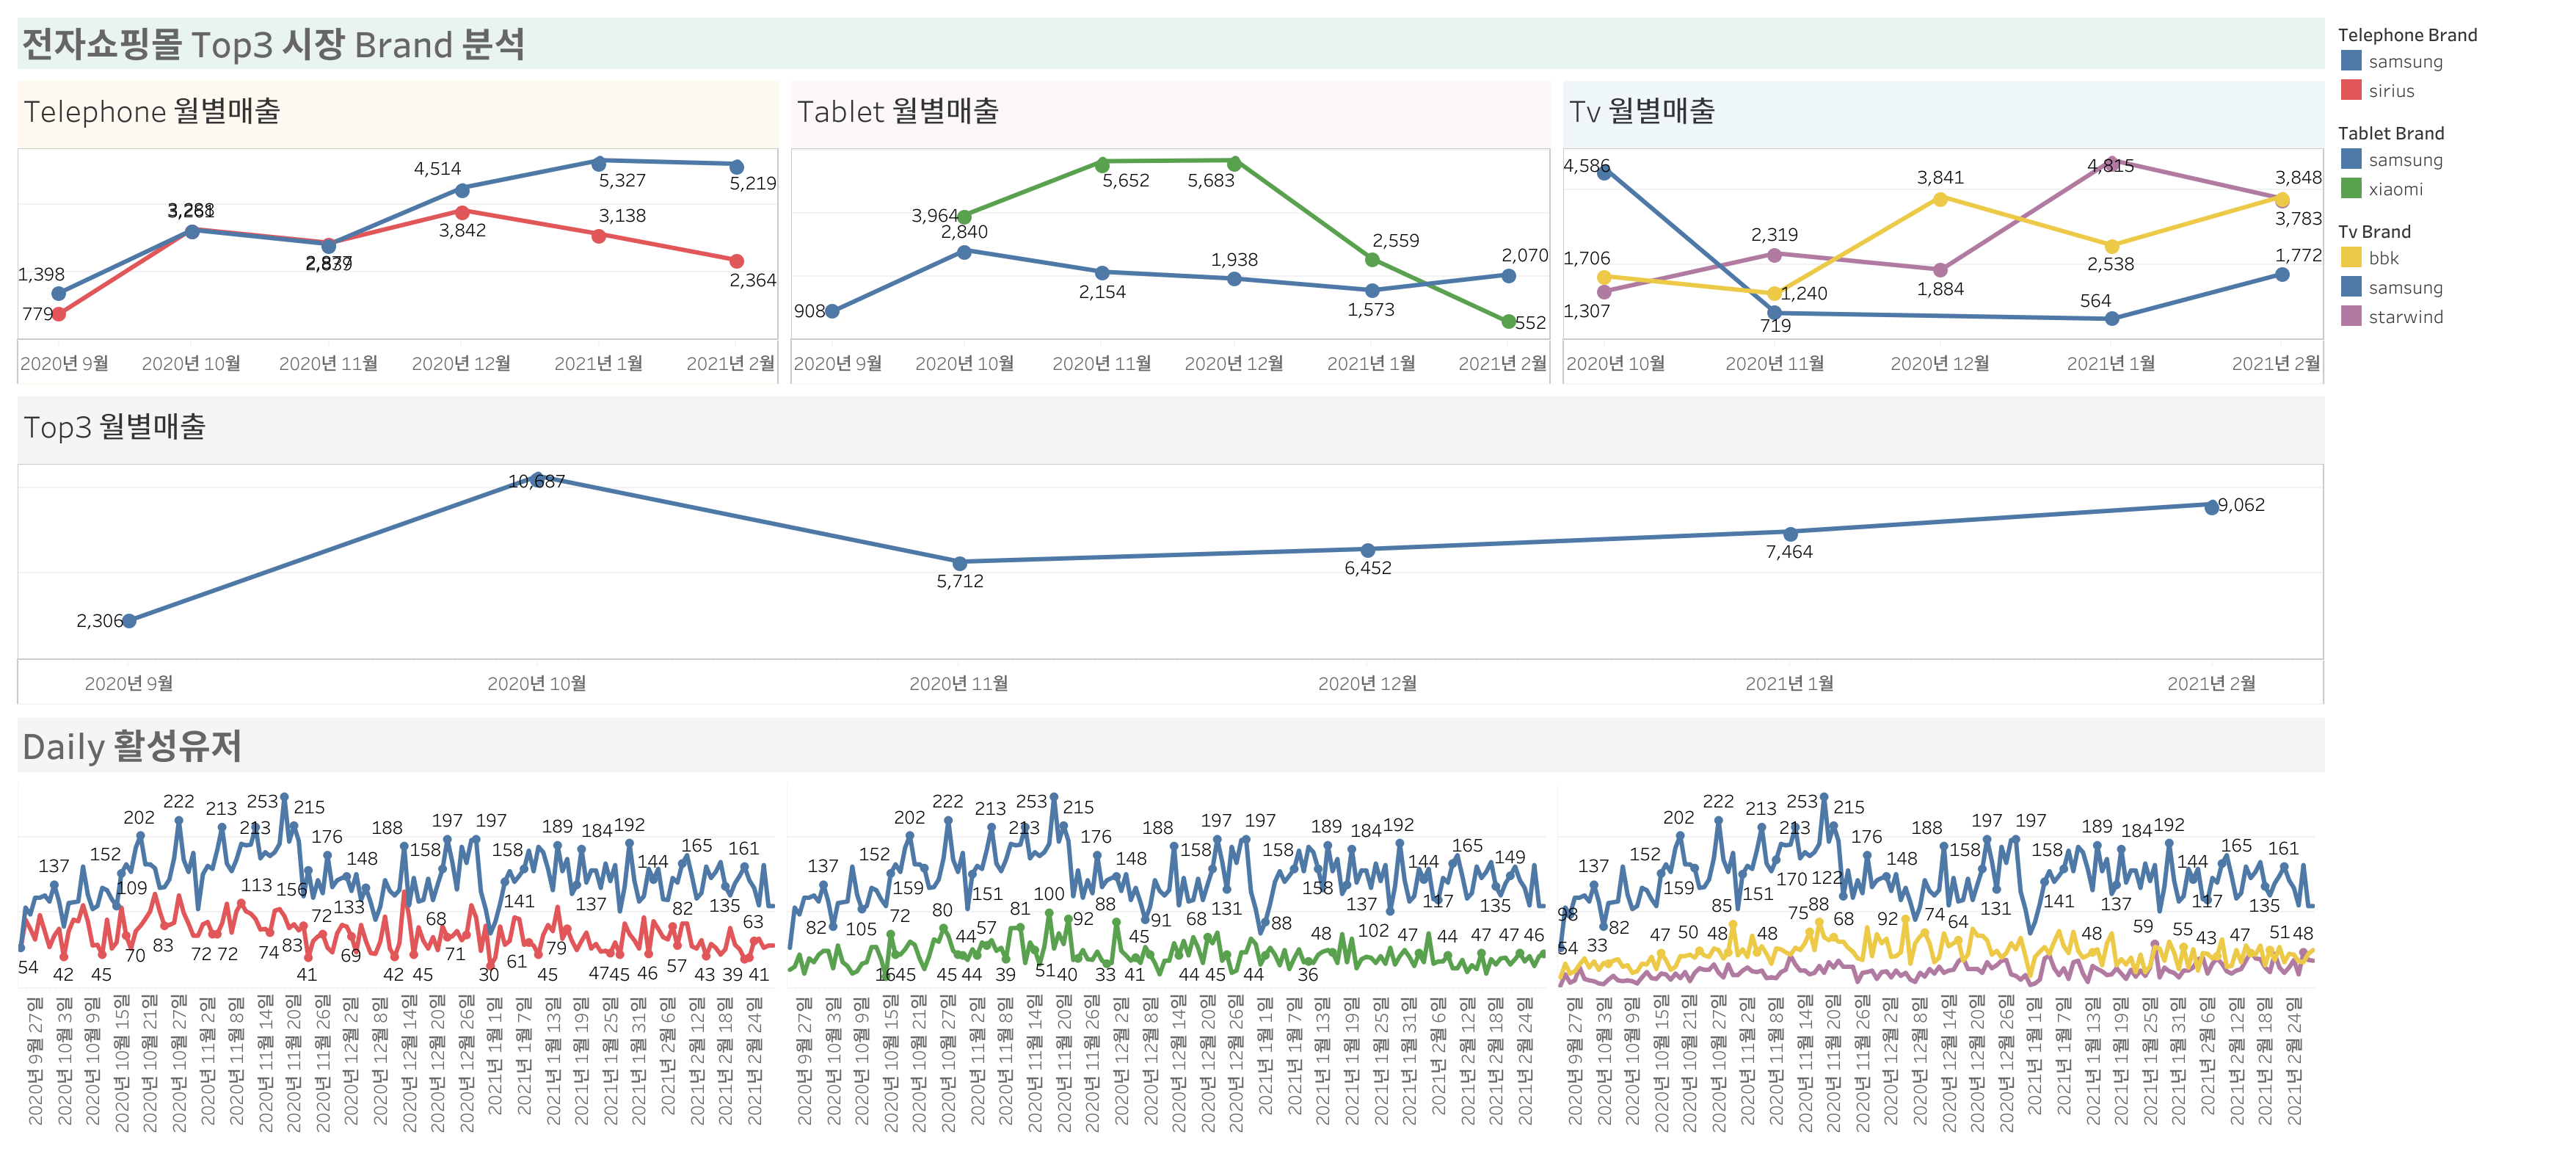

In [3]:
from IPython.display import Image
Image("대시보드.png")

## A9. 구매 연관 규칙 분석

In [ ]:
purchase_data = df2[df2['event_type'] == 'purchase']
more_purchase_data = purchase_data.groupby(['user_id', 'category_1']).size().reset_index(name='purchase_count')
more_than_one_purchase = more_purchase_data[more_purchase_data['purchase_count'] > 1]
purchase_category = more_than_one_purchase.pivot_table(index='user_id', columns='category_1', values='purchase_count', fill_value=0)

category_1,acoustic,air_heater,alarm,bag,battery,bicycle,blender,calculator,camera,cartrige,...,vacuum,video,videocards,videoregister,vr,weather_station,welding,wifi,window,wrench
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353534622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515915625353561691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1515915625353900095,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1515915625354561351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515915625354857951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515915625610976222,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1515915625610977027,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515915625610991774,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [ ]:
# 값이 1 이상인 경우 True로, 0인 경우 False로 변경
purchase_category_bool = purchase_category.applymap(lambda x: True if x >= 1 else False)
purchase_category_bool

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


category_1,acoustic,air_heater,alarm,bag,battery,bicycle,blender,calculator,camera,cartrige,...,vacuum,video,videocards,videoregister,vr,weather_station,welding,wifi,window,wrench
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353534622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625353561691,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1515915625353900095,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1515915625354561351,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625354857951,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515915625610976222,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1515915625610977027,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625610991774,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# ▶ max_len =3, 최대 3개까지의 리스트가 들어간 연관규칙 탐색

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemset = apriori(purchase_category_bool,
                           min_support=0.005,
                           max_len=3,
                           use_colnames=True)

frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# ▶ 전체 연관 규칙 출력
frequent_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
21,0.206887,(unknown),1
23,0.194646,(videocards),1
19,0.116626,(telephone),1
2,0.079769,(cartrige),1
15,0.071025,(printer),1
4,0.038472,(cpu),1
11,0.036723,(motherboard),1
12,0.035647,(notebook),1
0,0.025962,(acoustic),1
18,0.025020,(tablet),1


```
▶ 연관 규칙 탐색의 결과

- support: 아이템 집합이 데이터셋에서 차지하는 비율을 나타낸다. 예를 들어, 0.206887의 지지도는 전체 거래의 약 20.7%에서 'unknown' 아이템이 발견되었다는 것을 의미한다.
- itemsets: 연관 규칙 탐색을 통해 발견된 아이템 집합이다.
- length: 아이템 집합에 포함된 아이템의 개수다.

여기서, length가 1인 경우는 단일 아이템에 대한 지지도를 보여주며, 2 이상의 경우는 두 개 이상의 아이템이 함께 나타날 때의 지지도를 보여준다.

▶ 결과
- 'cpu'와 'motherboard'가 함께 나타나는 거래는 전체의 약 0.8%를 차지한다.
- 0.8% 수준이라면 연관 상품성은 거의 없다고 볼 수 있다.
```

In [ ]:
# ▶ 2개 이상의 Item 품목들이 있는 연관 규칙 출력
frequent_itemset[frequent_itemset['length'] >= 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
25,0.007937,"(cpu, motherboard)",2
27,0.006995,"(cpu, videocards)",2
28,0.005515,"(motherboard, videocards)",2
29,0.005381,"(unknown, videocards)",2
26,0.005246,"(unknown, cpu)",2


```
▶ length가 2 이상이 아이템 집합을 필터링 했지만, 그 양이 제한적이다.

▶ 또 연관 규칙 출력 값으로 나온 cpu, motherboard의 상품 연관성은 0.8%로 낮은 수준이다.

- 마케팅 관점에서 삼성의 컴퓨터 부품(motherboard나 cpu)을 수급하거나 상품성이 있는 제품을 시장 Test하는 것도 방법이다.
```

## A10. brand 연관규칙 분석

In [ ]:
purchase_data = df2[df2['event_type'] == 'purchase']
more_brand_data = purchase_data.groupby(['user_id', 'brand']).size().reset_index(name='brand_count')
more_than_one_brand = more_brand_data[more_brand_data['brand_count'] > 1]
brand_category = more_than_one_brand.pivot_table(index='user_id', columns='brand', values='brand_count', fill_value=0)

In [ ]:
# 값이 1 이상인 경우 True로, 0인 경우 False로 변경
purchase_brand_bool = brand_category.applymap(lambda x: True if x >= 1 else False)
purchase_brand_bool

brand,accesstyle,accord,acer,acmepower,acv,adata,aerocool,agestar,alas,alcatel,...,xerox,xiaomi,yaxun,yeastar,yixing,zalman,zebra,zetton,zte,zyxel
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353534622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625353561691,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625354561351,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625354857951,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625355179497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515915625610976222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625610977027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1515915625610991774,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# ▶ max_len =3, 최대 3개까지의 리스트가 들어간 연관규칙 탐색

from mlxtend.frequent_patterns import apriori, association_rules

frequent_brandset = apriori(purchase_brand_bool,
                           min_support=0.005,
                           max_len=3,
                           use_colnames=True)

frequent_brandset['length'] = frequent_brandset['itemsets'].apply(lambda x: len(x))
frequent_brandset.sort_values('support',ascending=False,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# ▶ 전체 연관 규칙 출력
frequent_brandset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
33,0.272970,(unknown),1
19,0.046715,(msi),1
13,0.046292,(gigabyte),1
2,0.036302,(asus),1
0,0.033066,(amd),1
8,0.030393,(canon),1
21,0.027578,(palit),1
30,0.025890,(sapphire),1
29,0.024061,(samsung),1
31,0.022794,(sirius),1


In [ ]:
# ▶ 2개 이상의 Item 품목들이 있는 연관 규칙 출력
frequent_brandset[frequent_brandset['length'] >= 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length


```
▶ 결과
    min_support 값(여기서는 0.005, 즉 0.5%) 이상의 지지도를 가지는 브랜드 조합이 없다는 것을 의미한다.
    즉, 데이터셋에서 두 개 이상의 브랜드가 함께 구매된 비율이 매우 낮거나 없음을 나타낸다.

    이런 경우?

    - 데이터셋 크기: 데이터셋의 크기가 작다면 빈번한 아이템 집합을 찾기 어려울 수 있다.
    - 지지도(min_support) 설정: 지지도가 너무 높게 설정되어 있을 수 있다. 지지도 값을 낮춰서 다시 분석을 시도해 볼 수 있다.
    - 데이터의 다양성: 구매 데이터 내에서 사용자들의 구매 패턴이 다양하거나 브랜드 충성도가 낮아 특정 브랜드들이 함께 구매되는 경우가 매우 적을 수 있다.
```


## A11. category 금액 분포
**ㄴsamsung에서 판매된 category 기준 전체 시장의 제품 금액대 조사**

In [ ]:
samsung_purchase_data=df2[(df2['event_type']=='purchase')&(df2['brand']=='samsung')]
samsung_category=samsung_purchase_data['category_1'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


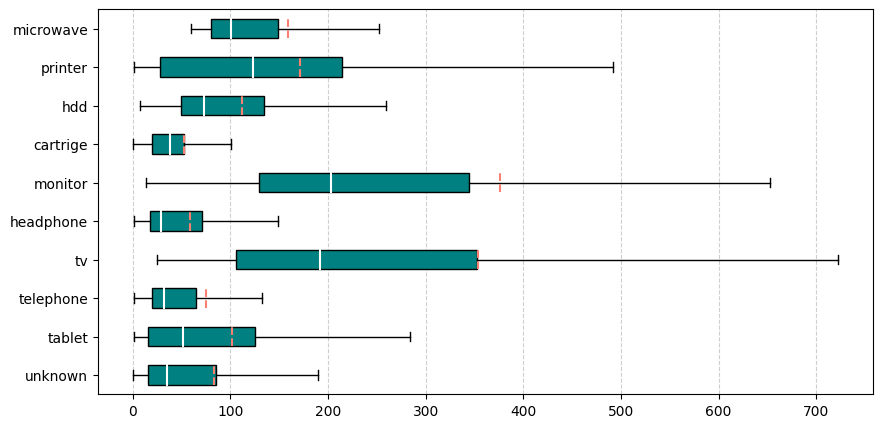

In [ ]:
plt.figure(figsize=(10,5))

box=plt.boxplot([df2[df2['category_1']==category]['price']for category in samsung_category],
            showfliers=False,showmeans=True,meanline=True,vert=False,labels=samsung_category
            ,patch_artist=True, boxprops={'facecolor':'teal'})
plt.setp(box['medians'],color='white',linewidth=1.5)
plt.setp(box['means'],color='salmon',linewidth=1.5)
plt.grid(axis='x',linestyle='--',alpha=0.6)
plt.show()

```
▶ 결과

    - 가격 범위: 각 카테고리별 가격의 범위와 중앙값을 쉽게 비교할 수 있다. 예를 들어, 'tv', 'monitor' 카테고리는 상대적으로 더 넓은 가격 범위를 가지며, 평균 가격도 높은 편이다.
    - 분포의 비대칭성: 중앙값이 박스 중앙에서 벗어나 있거나 평균선이 중앙값에서 멀리 떨어져 있으면, 데이터 분포가 비대칭적임을 나타낸다.
    - 가격 대비 카테고리별 위치: 가격이 높거나 낮은 카테고리의 상대적 위치를 파악할 수 있다.

    => 'tv' 카테고리의 높은 가격 범위를 더 세분화하여 다양한 고객층을 대상으로 한 마케팅 전략을 수립

### Top3 월별 세션 분석

In [ ]:
samsung_top3=['telephone','tv','tablet']

# ▶ 시간대별 이벤트 유형별 발생 횟수 계산
hourly_events=samsung_data[samsung_data['category_1'].isin(samsung_top3)].groupby(['month', 'event_type']).size().unstack().fillna(0)

# ▶ 시간대별 구매 전환률 계산: 구매수 / 조회수
hourly_events['conversion_rate'] = hourly_events['purchase'] / hourly_events['view'] * 100

hourly_events[['view', 'cart', 'purchase', 'conversion_rate']]

# ▶ gradient 시각화

styled_all_columns = hourly_events.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
styled_all_columns

event_type,cart,purchase,view,conversion_rate
month,,,,
1,139,97,2973,3.262698
2,133,109,2518,4.328832
9,20,22,437,5.034325
10,123,93,2697,3.448276
11,125,99,3275,3.022901
12,117,81,2754,2.941176


```
▶ Top3를 묶어 이탈률을 봤을 때 매출이 일주일만 기록된 9월을 제외하면 2월이 가장 높게 나타나므로 마케팅과 이벤트를 2월에 진행하는 것이 효과적으로 보임.
```


### Top3 월별 매출 분석

([<matplotlib.axis.XTick at 0x784c37b4f2e0>,
 [Text(0, 0, '9'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '1'),
  Text(5, 0, '2')])

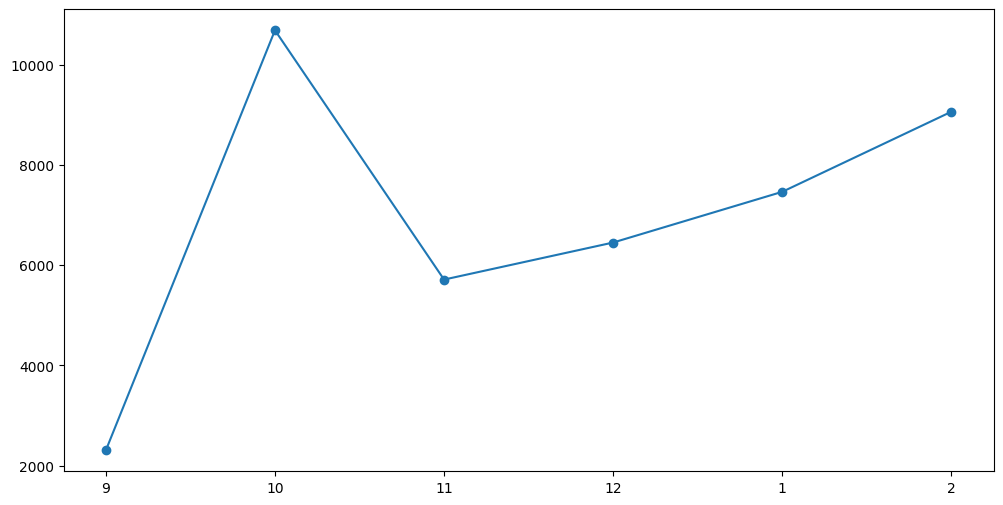

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 설정
plt.figure(figsize=(12, 6))

# 원하는 순서대로 month 값을 가지는 새로운 데이터프레임 생성
desired_order = [9, 10, 11, 12, 1, 2]
samsung_top3_sales_sorted = samsung_top3_sales.reindex(desired_order)

# 새로운 순서로 데이터 시각화
plt.plot(range(len(samsung_top3_sales_sorted)), samsung_top3_sales_sorted.values, marker='o', linestyle='-')
plt.xticks(range(len(samsung_top3_sales_sorted)), samsung_top3_sales_sorted.index)


```
▶ top3의 매출이 10월에서 11월 한달간 하락하다 11월부터 상승세임.
```

# 📌 결론

> **결론 및 인사이트**

```
<Ecommerce 시장 분석>
- View → Purchase 전환율 4.4%, 9~11시 사이 전환율이 5.2~5.3% 가장 높은 시간으로 할인 쿠폰을 제공하여 타겟 마켓팅을 활용하면 전환율이 더 높아질 것으로 예상함.
- 월 매출은 전반적으로 상승세이며 10월 기준 2월까지의 매출을 비교하면 244% 성장한 것을 볼 수 있음.
- Category 전체 판매량 Top3 : videocards(18%) > telephone(11%) > catrige(7%)
                 매출 Top3: videocards > printer > cpu      *unknown(20%)

<Samsung 브랜드 분석>
1. 매출 순위 Top3: telephone(41%) > tablet(21%) > tv(14%)

1-1) Telephone
- 매출 순위 1위 samsung 2위 sirius
   판매량 순위 1위 sirius 2위 samsung
- telephone 시장의 평균값은 36, samsung은 82, sirius는 53 인것으로 보아 samsung은 프리미엄 전략 상품을 판매하여 매출 1위를 유지하고 있는 것을 알 수 있다.
- 활성수치 비교시 samsung이 월등히 높지만 판매량 비교시 sirius에 2.5배 차이로 밀리는 것을 볼 수 있다.
- 구매 전환율은 samsung 2월(3.7%), sirius 12월(10.2%)로 이를 참고하여 월별 마케팅 및 이벤트를 실시한다면 구매 전환율을 높일 수 있을 것이다.

1-2) Tablet
- 매출 순위 1위 xiaomi 2위 samsung
   판매량 순위 1위 samsung 2위 xiaomi
- tablet 시장의 평균값은 63, samsung은 53, xiaomi는 283로 판매량은 samsung이 3.5배 많지만 수익에서 xiaomi와 1.6배 차이나는 것으로 보아 xiaomi는
프리미엄 전략 상품을 판매하여 매출 1위를 유지하고 있는 것을 알 수 있다.
- 구매 전환율은 samsung 9월(14.2%), xiaomi 12월(5.6%)로 이를 참고하여 월별 마케팅 및 이벤트를 실시한다면 구매 전환율을 높일 수 있을 것이다.

1-3) Tv
- 매출 순위 1위 starwind 2위 bbk 7위 samsung
   판매량 순위 1위 bbk 2위 starwind
- tv 시장의 평균값은 149, samsung은 695, starwind는 119, bbk는 98로 starwind와 bbk 두 브랜드 모두 저가 공세로 매출 상위권을 선점하고 있는 것을 알 수 있다.
- 활성수치 비교시 samsung이 bbk, starwind에 비해 월등히 높은 것을 보아 고객 인식 측면에서 경쟁력이 있음의 가능성을 발견하였다.
- 구매 전환율은 samsung 2월(2.1%), bbk 2월(4.9%), starwind 1월(5.9%)로 이를 참고하여 월별 마케팅 및 이벤트를 실시한다면 구매 전환율을 높일 수 있을 것이다.

2. Unknown
- 데이터 값의 20%를 차지했던 unknown의 값을 분석한 결과 이상치인 것을 확인하였다.

3. 판매된 Cateogory의 Ecommerce Market 가격 분포
- 평균값과 중간값의 차이가 상당한 것으로 보아 가격 분포가 정규분포를 이루고 있지 않음을 알 수 있다.

4. Samsung 매출 Top3 (telephone, tablet, tv)
- Top3의 월별 전환율 중 일주일만 기록된 9월을 제외하면 2월이 가장 높게 나타나므로 마케팅과 이벤트를 2월에 진행하는 것이 효과적으로 보임.
- telephone 구매시 tablet이나 tv 할인 등 프로모션을 적용하면 전환율이 높아지지 않을까 하는 제안을 남김.
- 10월에서 11월에 급감하는 이유를 분석하면 좋을 것 같음!

5. 연관 규칙 탐색의 결과
- 'cpu'와 'motherboard'가 함께 나타나는 거래는 전체의 약 0.8%를 수준아다.
- 0.8% 수준이라면 연관 상품성은 거의 없다고 볼 수 있다.
- 마케팅 관점에서 삼성의 컴퓨터 부품(motherboard나 cpu)을 수급하거나 상품성이 있는 제품을 시장 Test하는 것도 현재의 데이터 내에서 마케팅 전개 방법이다. (다만 그 효과는 미미할 것으로 예상)

6. 브랜드 연관 규칙 탐색 결과
- min_support 값(여기서는 0.005, 즉 0.5%) 이상의 지지도를 가지는 브랜드 조합이 없다는 것을 의미한다. 즉, 데이터셋에서 두 개 이상의 브랜드가 함께 구매된 비율이 매우 낮거나 없음을 나타낸다.

이런 경우?

- 데이터셋 크기: 데이터셋의 크기가 작다면 빈번한 아이템 집합을 찾기 어려울 수 있다.
- 지지도(min_support) 설정: 지지도가 너무 높게 설정되어 있을 수 있다. 지지도 값을 낮춰서 다시 분석을 시도해 볼 수 있다.
- 데이터의 다양성: 구매 데이터 내에서 사용자들의 구매 패턴이 다양하거나 브랜드 충성도가 낮아 특정 브랜드들이 함께 구매되는 경우가 매우 적을 수 있다.

7. samsung에서 판매된 category 기준 전체 시장의 제품 금액대 조사

- 가격 범위: 각 카테고리별 가격의 범위와 중앙값을 쉽게 비교할 수 있다. 예를 들어, 'tv', 'monitor' 카테고리는 상대적으로 더 넓은 가격 범위를 가지며, 평균 가격도 높은 편이다.
- 분포의 비대칭성: 중앙값이 박스 중앙에서 벗어나 있거나 평균선이 중앙값에서 멀리 떨어져 있으면, 데이터 분포가 비대칭적임을 나타낸다.
- 가격 대비 카테고리별 위치: 가격이 높거나 낮은 카테고리의 상대적 위치를 파악할 수 있다.
=> 'tv' 카테고리의 높은 가격 범위를 더 세분화하여 다양한 고객층을 대상으로 한 마케팅 전략을 수립


```


> **결론 및 인사이트 2**

```
▶ 시장 점유율 확대: 삼성의 주요 제품 범주인 전화기와 태블릿에서의 판매량과 매출은 일관되게 상위권을 차지하고 있다.
   그러나, 특정 카테고리(예: 프린터)에서는 상대적으로 낮은 판매량과 매출을 보이며, 이는 시장 점유율 확대를 위한 기회로 볼 수 있다.

▶ 가격 전략의 중요성: 일부 카테고리에서는 낮은 가격이 높은 판매량으로 이어지지 않는 것으로 나타났다.
   이는 소비자들이 단순히 가격뿐만 아니라 브랜드 인지도, 제품의 품질과 기능성 등 다른 요소들을 고려하여 구매 결정을 내리고 있음을 시사한다.

▶ 계절성 및 시간대 판매 동향: 시간대별 및 월별 판매 데이터는 구매 행동에 있어서 계절성 및 일상 패턴을 보여준다.
   예를 들어, 특정 달에 높은 구매 활동을 보이는 것이 확인됐다. 이는 타겟 마케팅 및 프로모션 계획에 활용될 수 있다.

▶ 마케팅 전략 수립: 데이터를 기반으로 마케팅 전략을 수립하여, 보급형 모델 개발, 프로모션 방안 구성 등 브랜드 인지도를 높이고, 타겟 고객에게
   도달할 수 있는 방안을 모색하였다.
```

> **아쉬운점**

```
▶ 전자기기 제품 특성상 재구매 사이클이 긴 것에 비해서 주어진 데이터 기간이 짧기 때문에 재구매율 분석에 어려움이 있었음.
   데이터의 기간이 길었으면 하는 아쉬움이 남았음.

▶ 브랜드선호도와 같은 원인분석을 결론지을때 리뷰데이터가 있으면 더 신뢰성 있는 분석결과가 나왔을텐데 하는 아쉬움이 남았음.

▶ UTC시간기준으로 이벤트기간이 2020-09-24 11:57:06 부터 2021-02-28 23:59:09 까지 존재했는데 글로벌시장기준 data라 가정했을 때 고객별 국가 data가
   없어서 세부적인 기간에 대한 분석에 어려움을 느꼈음. 또한 국가 data가 있으면 국가별 시장분석도 가능했을텐데 하는 아쉬움이 남았음.
```

## 번외

```
분석 시도는 해보았으나, 마무리가 어려워서 결론 짓지 못한 부분

```

In [ ]:
# event_type이 purchase인 사람들 중, 가장 많이 purchase한 사람 top10

df2[df2['event_type'] == 'purchase'].groupby('user_id')['user_id'].count().sort_values(ascending=False).to_frame().head(10)

,user_id
user_id,
1515915625601579158,56
1515915625591659523,49
1515915625596534847,45
1515915625604175669,43
1515915625605054644,42
1515915625599634258,39
1515915625521745364,36
1515915625603840072,33
1515915625603113992,28


In [ ]:
# purchase 1위 1515915625601579158, 이 사람이 산 것은?

df2[(df2['user_id'] == 1515915625601579158) & (df2['event_type'] == 'purchase')]['category_1'].value_counts()

category_1
videocards     47
cpu             5
motherboard     4
Name: count, dtype: int64

```
▶ purchase를 가장 많이 한 user인 1515915625601579158는
    videocards, cpu, motherboard를 구매함
```

In [ ]:
#  samsung 구매한 사람들 중, 가장 많이 purchase한 사람 top10

df2[(df2['event_type'] == 'purchase') & (df2['brand'] == 'samsung')].groupby('user_id')['user_id'].count().sort_values(ascending=False).to_frame()

,user_id
user_id,
1515915625526914687,6
1515915625603287577,6
1515915625560247311,5
1515915625596223978,5
1515915625540831164,5
...,...
1515915625546137343,1
1515915625546103649,1
1515915625546101004,1


In [ ]:
# 삼성 제품을 많이 구매한 1515915625526914687, 이 사람이 산 것은?

df2[(df2['user_id'] == 1515915625526914687) & (df2['event_type'] == 'purchase')]['category_1'].value_counts()

category_1
tablet    6
Name: count, dtype: int64

```
▶ 삼성 제품 purchase를 가장 많이 한 user인 1515915625526914687는
    tablet을 구매함
```

In [ ]:
# telephone을 구매한 사람

purchase_telephone = df2[(df2['event_type'] == 'purchase') & (df2['category_1'] == 'telephone')].groupby('user_id').agg(count=('user_id', 'count'))
purchase_telephone.sort_values('count', ascending=False)

,count
user_id,
1515915625540542963,16
1515915625608555607,14
1515915625527591469,12
1515915625520756318,11
1515915625524282777,11
...,...
1515915625541337854,1
1515915625541335838,1
1515915625541332046,1


In [ ]:
# telephone을 가장 많이 구매한 1515915625540542963인 사람의 데이터 살펴보기

df2[df2['user_id'] == 1515915625540542963][['event_time', 'event_type', 'brand', 'price', 'category_1']].groupby(['event_type', 'brand']).count()

event_time  price  category_1
event_type brand                                   
cart       dyp                 2      2           2
           sirius              4      4           4
           unknown             7      7           7
purchase   dyp                 4      4           4
           sirius              3      3           3
           unknown             9      9           9
view       dyp                 5      5           5
           icasemore           1      1           1
           sirius              4      4           4
           smarterra           1      1           1
           unknown            17     17          17

```
▶ 1515915625540542963는
    구경은 dyp, icasemore, sirius, smarterra, unknown 했으나,
    구매는 dyp, sirius, unknown에서만 함
```

In [ ]:
# 삼성에서 telephone을 구매한 사람은 다른 브랜드를 구경했을까?

# 삼성에서 telephone을 구매한 user_id
samsung_telephone_purchase_user = df2[(df2['event_type'] == 'purchase') & (df2['brand'] == 'samsung') & (df2['category_1'] == 'telephone')].groupby('user_id').agg(count=('user_id', 'count'))
samsung_telephone_purchase_user.sort_values('count', ascending=False)

,count
user_id,
1515915625541206604,5
1515915625560247311,5
1515915625539279532,5
1515915625556255951,4
1515915625567129806,4
...,...
1515915625569825097,1
1515915625533004674,1
1515915625568908377,1


In [ ]:
# 삼성의 telephone을 5번 구매한 사람인 1515915625541206604 데이터 살펴보기

df2[df2['user_id'] == 1515915625541206604][['event_time', 'event_type', 'brand', 'price', 'category_1']].groupby(['event_type', 'brand']).count()

event_time  price  category_1
event_type brand                                 
cart       samsung           5      5           5
purchase   samsung           5      5           5
view       samsung          23     23          23
           unknown           2      2           2

```
▶ 1515915625541206604는
    구경은 samsung, unknown 했으나,
    구매는 samsung에서 함
```

In [ ]:
# user_id가 1515915625560247311인 사람의 데이터 살펴보기

df2[df2['user_id'] == 1515915625560247311][['event_time', 'event_type', 'brand', 'price', 'category_1']].groupby(['event_type', 'brand']).count()

,,event_time,price,category_1
event_type,brand,,,
cart,samsung,4,4,4
purchase,samsung,5,5,5
view,samsung,8,8,8


```
▶ 1515915625560247311는
    구경도 samsung, 구매도 samsung
```

```
▶ 아쉬운 점
    samsung 브랜드를 view하고, 다른 브랜드에서 purchase한 고객들의 비율을 찾아보고 싶었으나 코드 짜는 데에 있어서 많은 어려움을 겪음
    - 구매에 있어서, 삼성이 아닌 다른 브랜드를 선택하게 된 이유에 대하여 분석해봤으면 좋을 거 같다는 생각이 듦
```